# A complete Machine Learning PipeLine

- Intoroduction to supervised Machine Learning
    - What is machine learning?
    - Types of Machine learning Algorithms
    - Supervised Machine Learning
    - Classification vs Regression
    - Machine Learning Pipeline
    
    
- Predict the onset of diabetes based on diagnostic measures

    - Data Preparing
        - Analyze Data
        - Descriptive Statitics
        - Data Visualization
    - Outliers investigation
        - Outliers investigation Single Feature
        - Outliers investigation Pairs
        
    - Evaluate Algorithms: Baseline
    - Feature Engineering 
        - Data Preprocessig
            - Standard Scaler
            - MinMax Scaler
        - Remove OutlierS
    - Feature Selection
        - Corrolation
        - Feature Importance
    - Ensemble Methods    
        - Algortithm Tuning
        - Voting Ensemble
        - Error Corrolation
        - Stacking
 
 -  Conclusion (Acuuracy 86%)
    
    


# Intoroduction to supervised Machine Learning:

## What is machine learning?
Task **T**: image classification problem of classifying dogs and cats 

Experience **E**: I would give a ML algorithm a
bunch of images of dogs and cats

The performance measure **P**: the ML algorithm could learn
how to distinguish a new image as being either a dog or cat.

Machine learning (Machine Learning by Tom Mitchell):

**A computer program is said to learn from experience **E** with
respect to some class of tasks **T** and performance measure **P**,
if its performance at tasks in **T**, as measured by **P**, Improves
with experience **E**.**

## Types of Machine learning Algorithms

1. Supervised Learning: Input data is called training data and
has a known label or result.
Ex: Spam/not-spam or a stock price at a time.

2. Unsupervised Learning: Input data is not labeled and does
not have a known result.
EX: Grouping customers by purchasing behavior

3. Semi-Supervised Learning: Input data is a mixture of labeled and
unlabeled examples.
EX: a photo archive where only some of the
images are labeled, (e.g. dog, cat, person) and the majority are
unlabeled.

4. Reinforcement Learning: a goal-oriented learning based
on interaction with environment. Autonomous cars.

## Supervised Machine Learning
1. Regression: Linear Regression, Logistic Regression

2. Instance-based Algorithms: k-Nearest Neighbor (KNN)

3. Decision Tree Algorithms: CART

4. Bayesian Algorithms: Naive Bayes

5. Ensemble Algorithms: eXtreme Gradient Boosting

6. Deep Learning Algorithms: Convolution Neural Network

## Classification vs Regression
**Classification** predicting a label .vs. **Regression** predicting a quantity.

## Classification Algorithms Examples:
- Linear: Linear Regression, Logistic Regression
- Nonlinear: Trees, k-Nearest Neighbors
- Ensemble:
    - Bagging: Random Forest
    - Boosting:  AdaBoost


## Machine Learning Pipeline:

- Define Problem
    - ML type of problem

- Prepare Data
    - Data Visualization methos ...
    - Data Selection
    - Feature Selection methods ..
    - Feature Engineering methods ..
    - Data Transormation methods ..

- Spot Check Algorithm
    - Test Harness ...
    - Perform Measure ...
    - Evaluate accuracy of different algorithms

- Improve Results 
    - Algorithms Turning methids
    - ensemble methods

- Present Results
    - Save the model

# Define Problem:
## Pima Indians Diabetes Database
### Predict the onset of diabetes based on diagnostic measures

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

**Attribute Information:**

1. Number of times pregnant 

2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test 

3. Diastolic blood pressure (mm Hg) 

4. Triceps skin fold thickness (mm) 

5. 2-Hour serum insulin (mu U/ml) 

6. Body mass index (weight in kg/(height in m)^2) 

7. Diabetes pedigree function 

8. Age (years) 

9. Class variable (0 or 1)

In [ ]:
import sys
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
%matplotlib inline

import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
py.init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings('ignore')

In [39]:
# Always good to set a seed for reproducibility
SEED = 7
np.random.seed(SEED)

# 2. Data Preparing 

In [38]:
# Loading Data
df = pd.read_csv('/kaggle/input/pima-indians-diabetes-database/diabetes.csv')
# Getting dataframe columns names
df_name=df.columns

## 2.1. Analyze Data:
### 2.1.1 Descriptive Statitics

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


- The data is not included time or object
- There is no null value in data set

In [41]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [42]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

### 2.2. Data Visualization
let's take look at our data in the most raw shape.
I really recommend scatter plot because we can get the idea of our data without any manipulation

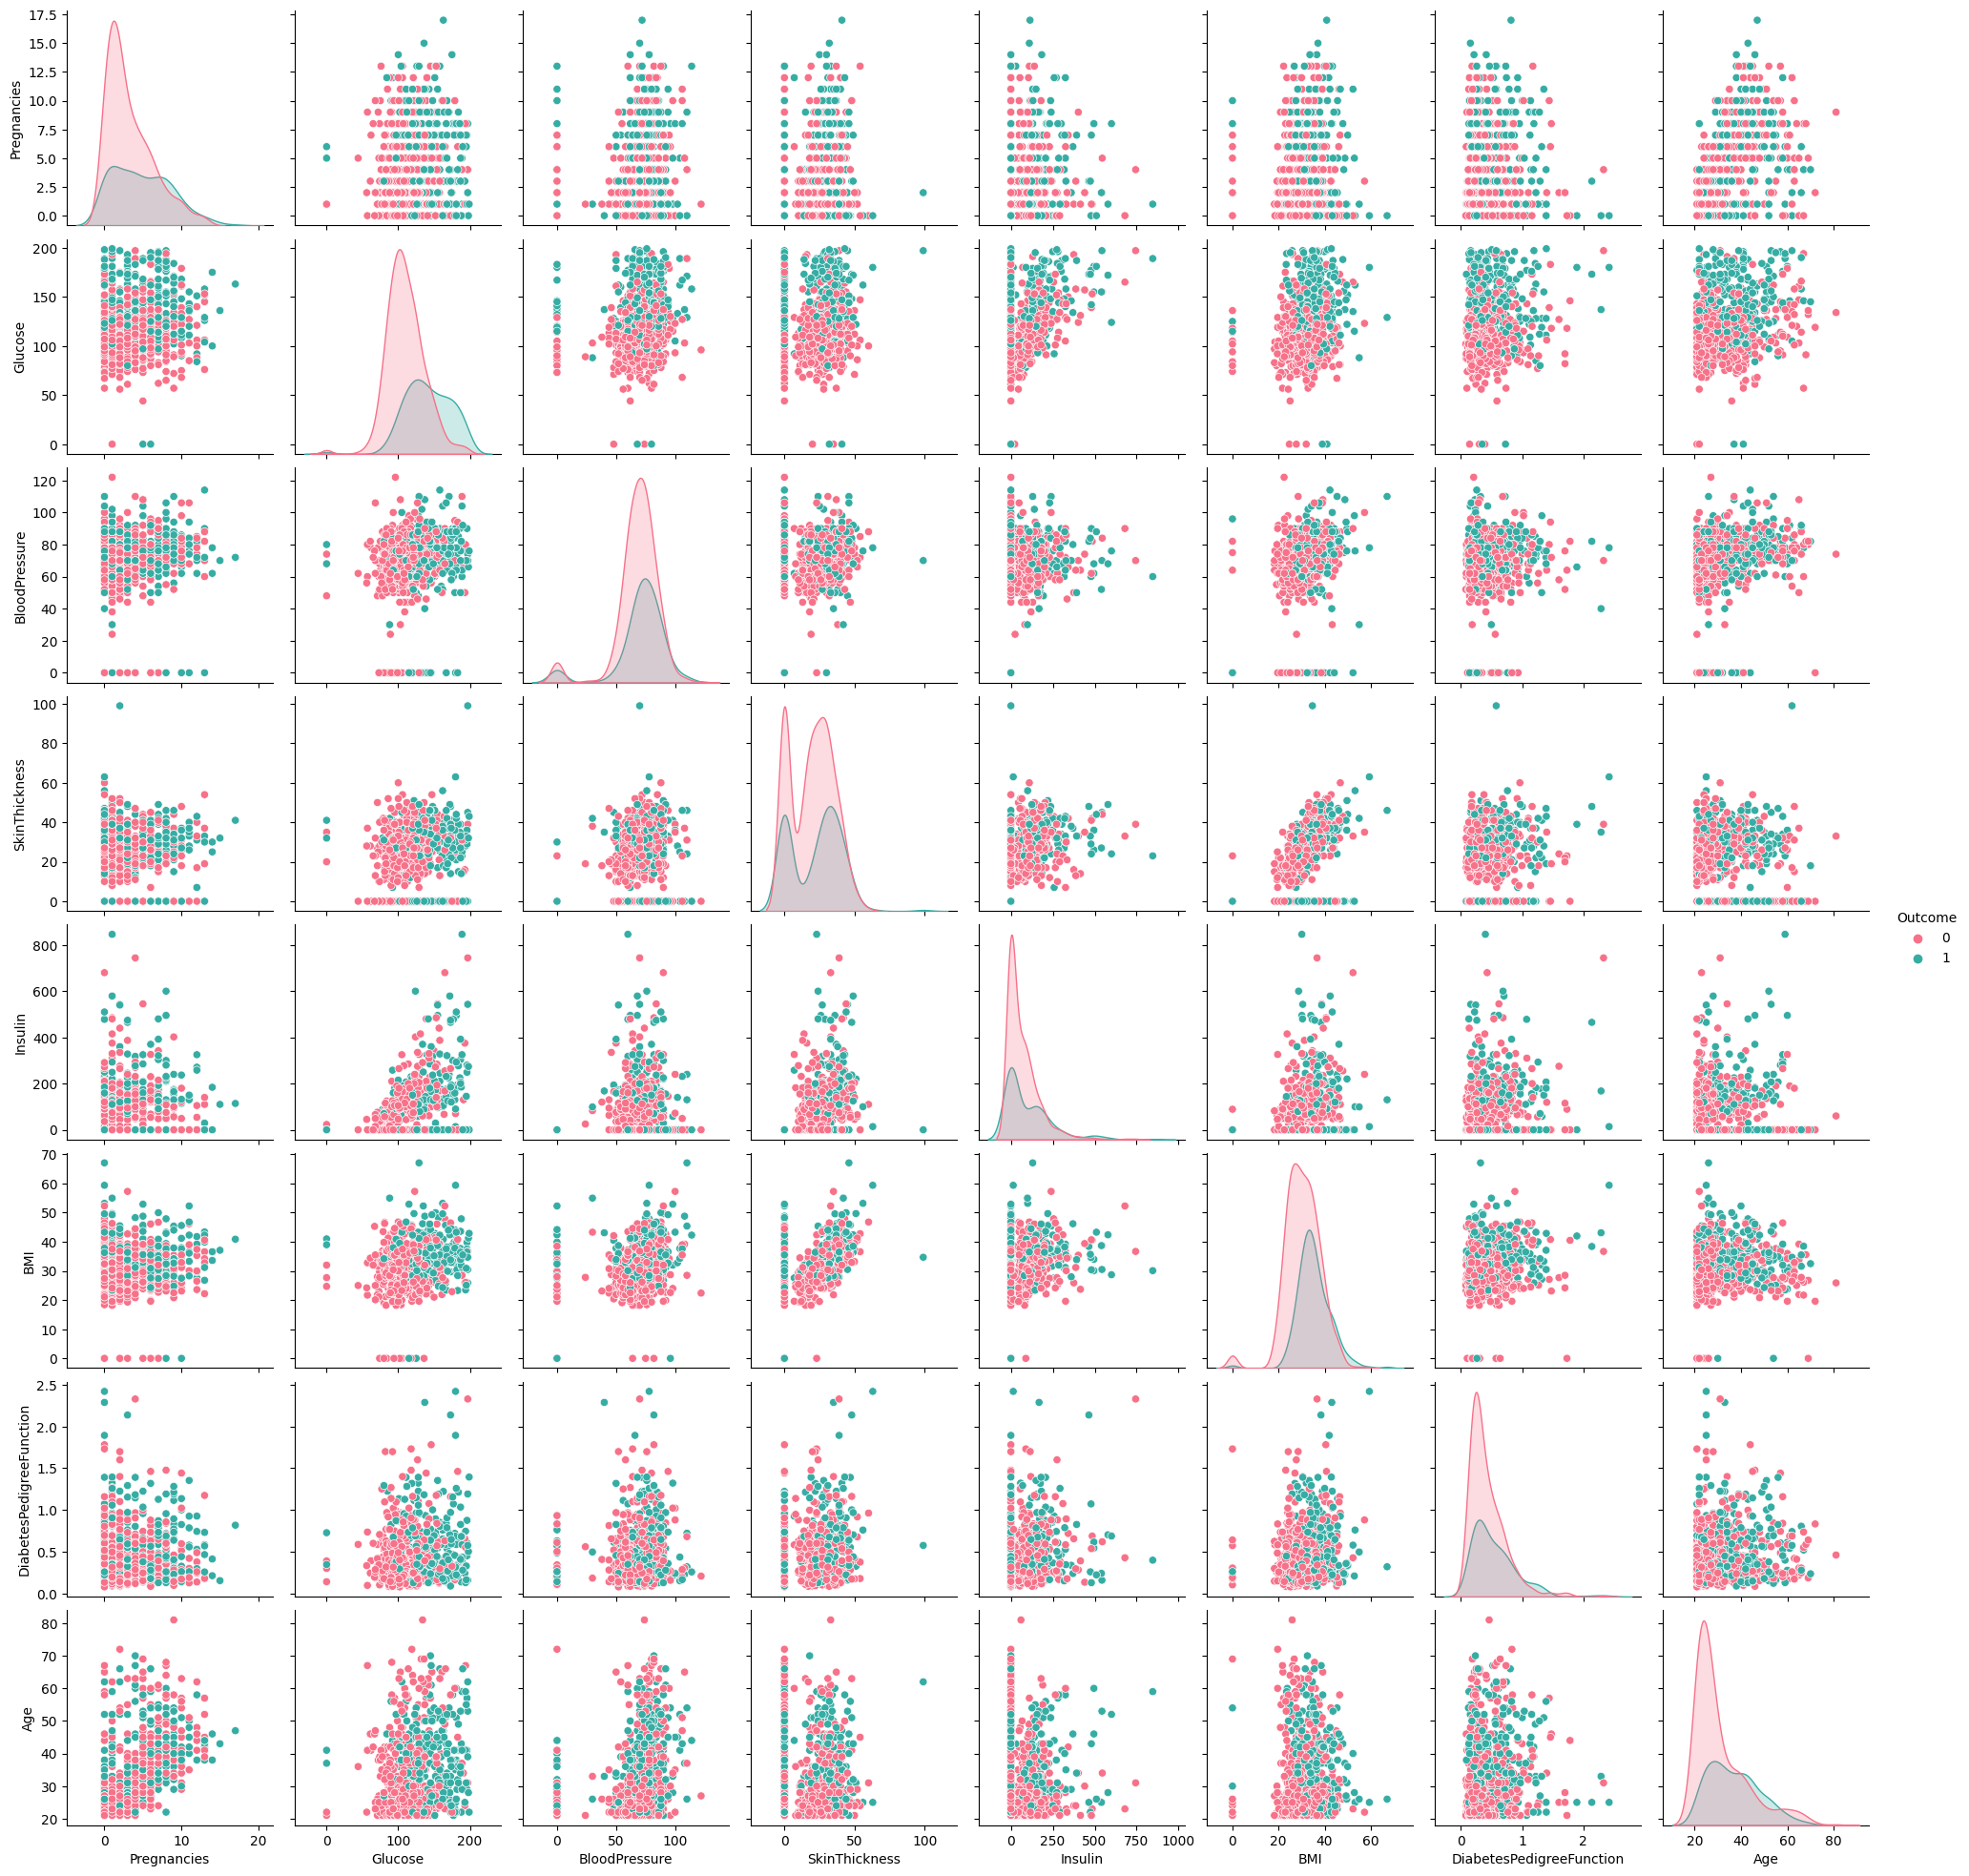

In [43]:
 g = sns.pairplot(df, hue="Outcome", palette="husl")

It seems that the data suffer from outliers

Let's see for example pregnency distribution

In [185]:
def plotHist(df,nameOfFeature):
    cls_train = df[nameOfFeature]
    data_array = cls_train
    hist_data = np.histogram(data_array)
    binsize = .5
    trace1 = go.Histogram(
        x=data_array,
        histnorm='percent',  # Change to 'percent' for percentage normalization
        name='Histogram of Wind Speed',
        autobinx=False,
        xbins=dict(
            start=df[nameOfFeature].min() - 1,
            end=df[nameOfFeature].max() + 1,
            size=binsize
        )
    )

    trace_data = [trace1]
    layout = go.Layout(
        bargroupgap=0.3,
         title='The distribution of ' + nameOfFeature,
        xaxis=dict(
            title=nameOfFeature,
            titlefont=dict(
                family='Courier New, monospace',
                size=18,
                color='#7f7f7f'
            )
        ),
        yaxis=dict(
            title='Number of labels',
            titlefont=dict(
                family='Courier New, monospace',
                size=18,
                color='#7f7f7f'
            )
        )
    )
    fig = go.Figure(data=trace_data, layout=layout)
    py.iplot(fig)

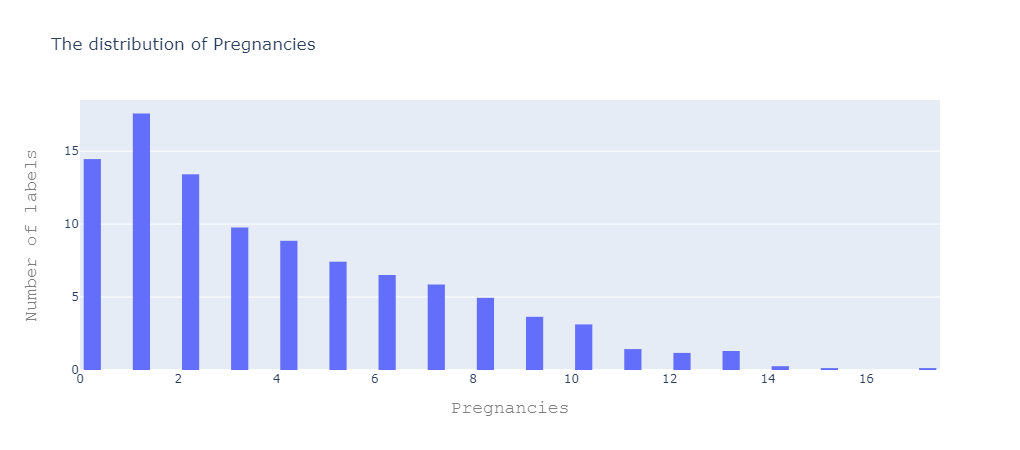

In [186]:
plotHist(df,'Pregnancies')

17 times pregnancy is a little bite strange is it outlier ?

Let's investagate each fearure distribution for each out come

A fundamental task in many statistical analyses is to characterize
the location and variability of a data set. A further
characterization of the data includes **skewness and kurtosis**.

**Skewness** is a measure of symmetry, or more precisely, the lack
of symmetry. A distribution, or data set, is symmetric if it
looks the same to the left and right of the center point.

**Kurtosis** is a measure of whether the data are heavy-tailed
or light-tailed relative to a normal distribution. That is,
data sets with high kurtosis tend to have heavy tails, or
outliers. Data sets with low kurtosis tend to have light
tails, or lack of outliers. A uniform distribution would
be the extreme case

In [187]:
from scipy.stats import skew
from scipy.stats import kurtosis
def plotBarCat(df,feature,target):
    
    
    
    x0 = df[df[target]==0][feature]
    x1 = df[df[target]==1][feature]

    trace1 = go.Histogram(
        x=x0,
        opacity=0.75
    )
    trace2 = go.Histogram(
        x=x1,
        opacity=0.75
    )

    data = [trace1, trace2]
    layout = go.Layout(barmode='overlay',
                      title=feature,
                       yaxis=dict(title='Count'
        ))
    fig = go.Figure(data=data, layout=layout)

    py.iplot(fig, filename='overlaid histogram')
    
    def DescribeFloatSkewKurt(df,target):
        """
            A fundamental task in many statistical analyses is to characterize
            the location and variability of a data set. A further
            characterization of the data includes skewness and kurtosis.
            Skewness is a measure of symmetry, or more precisely, the lack
            of symmetry. A distribution, or data set, is symmetric if it
            looks the same to the left and right of the center point.
            Kurtosis is a measure of whether the data are heavy-tailed
            or light-tailed relative to a normal distribution. That is,
            data sets with high kurtosis tend to have heavy tails, or
            outliers. Data sets with low kurtosis tend to have light
            tails, or lack of outliers. A uniform distribution would
            be the extreme case
        """
        print('-*-'*25)
        print("{0} mean : ".format(target), np.mean(df[target]))
        print("{0} var  : ".format(target), np.var(df[target]))
        print("{0} skew : ".format(target), skew(df[target]))
        print("{0} kurt : ".format(target), kurtosis(df[target]))
        print('-*-'*25)
    
    DescribeFloatSkewKurt(df,target)

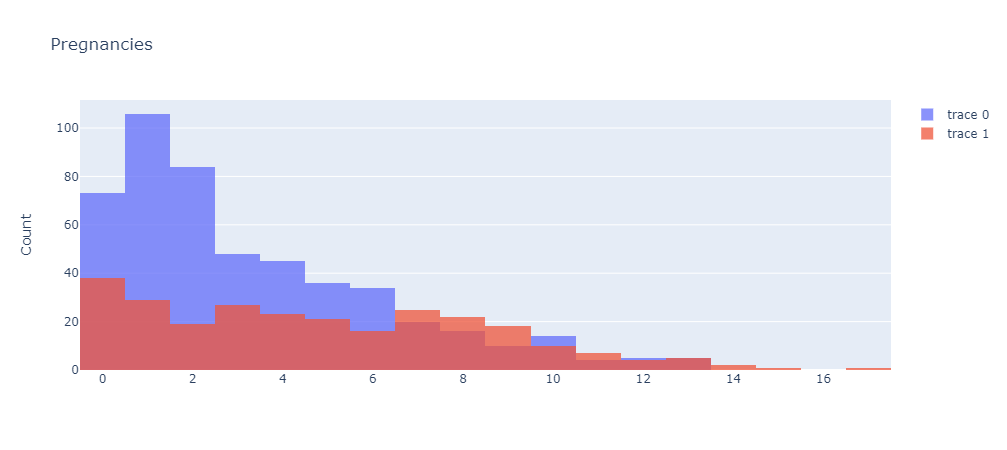

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Outcome mean :  0.3489583333333333
Outcome var  :  0.22718641493055558
Outcome skew :  0.6337757030614577
Outcome kurt :  -1.5983283582089547
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-


In [188]:
plotBarCat(df,df_name[0],'Outcome')

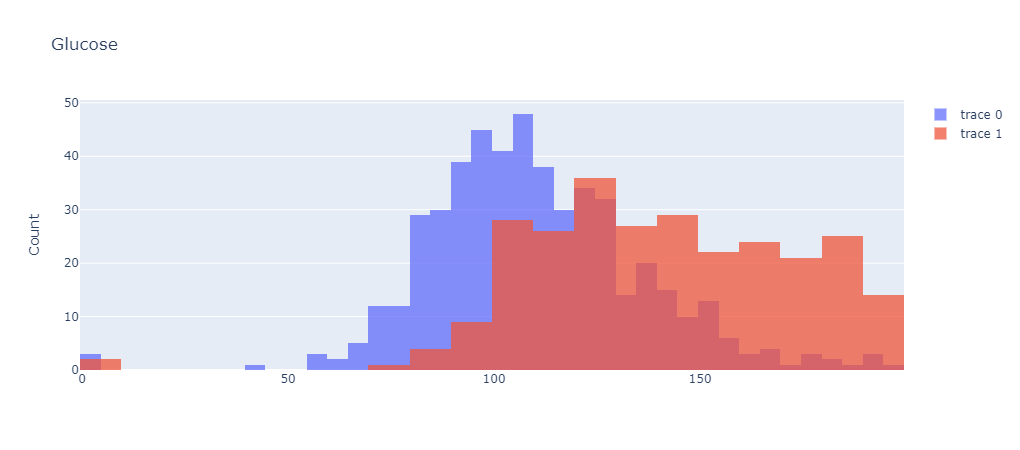

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Outcome mean :  0.3489583333333333
Outcome var  :  0.22718641493055558
Outcome skew :  0.6337757030614577
Outcome kurt :  -1.5983283582089547
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-


In [189]:
plotBarCat(df,df_name[1],'Outcome')

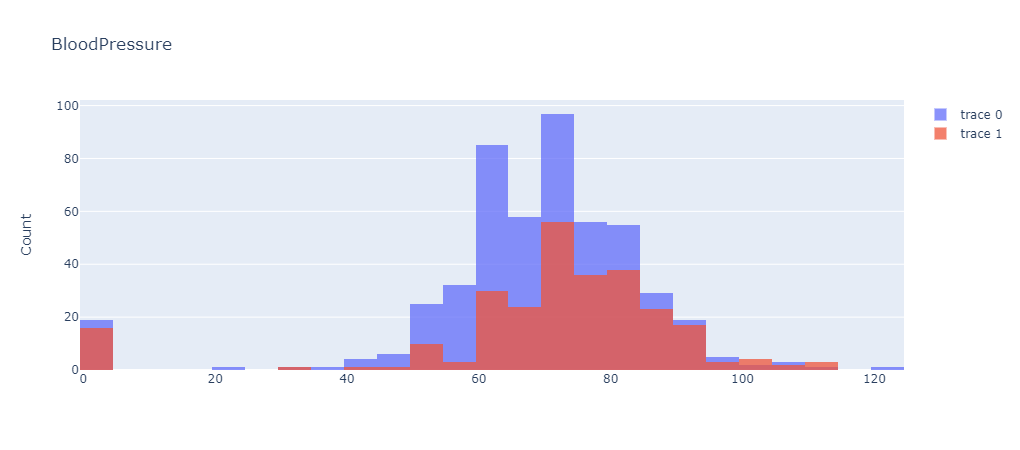

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Outcome mean :  0.3489583333333333
Outcome var  :  0.22718641493055558
Outcome skew :  0.6337757030614577
Outcome kurt :  -1.5983283582089547
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-


In [190]:
plotBarCat(df,df_name[2],'Outcome')

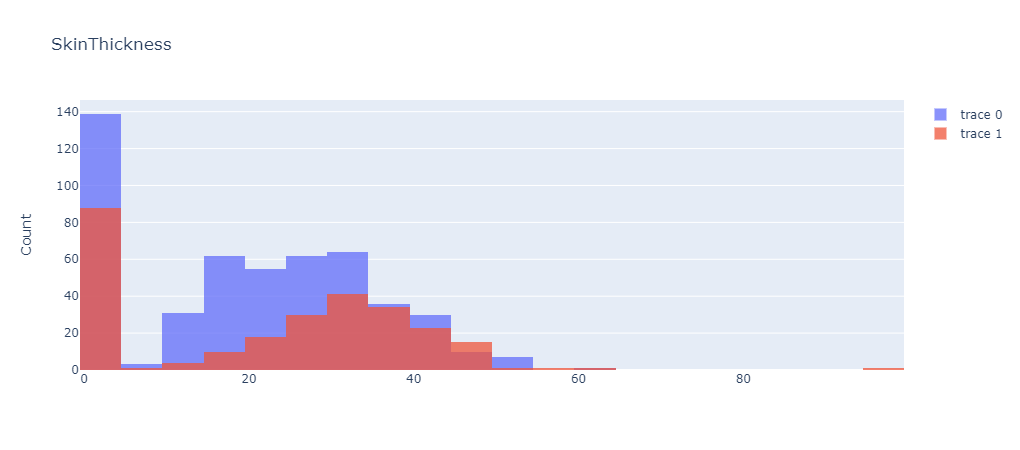

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Outcome mean :  0.3489583333333333
Outcome var  :  0.22718641493055558
Outcome skew :  0.6337757030614577
Outcome kurt :  -1.5983283582089547
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-


In [191]:
plotBarCat(df,df_name[3],'Outcome')

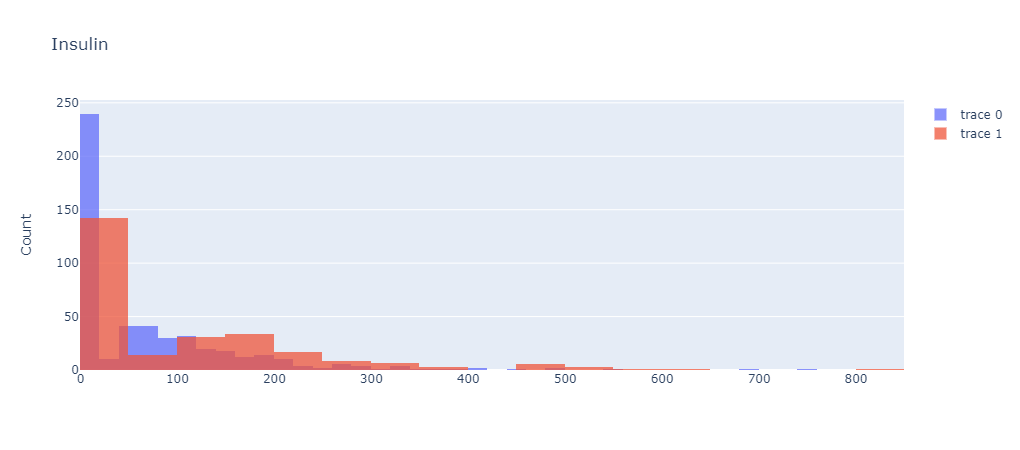

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Outcome mean :  0.3489583333333333
Outcome var  :  0.22718641493055558
Outcome skew :  0.6337757030614577
Outcome kurt :  -1.5983283582089547
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-


In [192]:
plotBarCat(df,df_name[4],'Outcome')

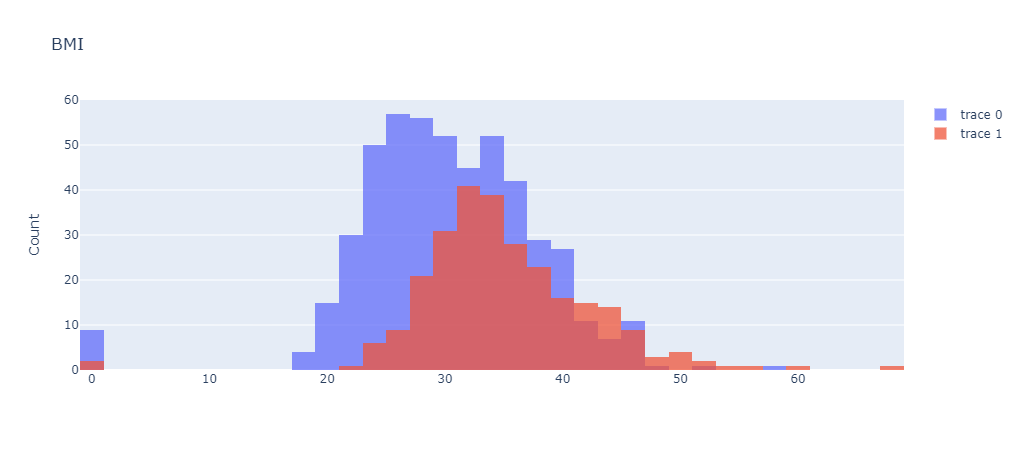

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Outcome mean :  0.3489583333333333
Outcome var  :  0.22718641493055558
Outcome skew :  0.6337757030614577
Outcome kurt :  -1.5983283582089547
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-


In [193]:
plotBarCat(df,df_name[5],'Outcome')

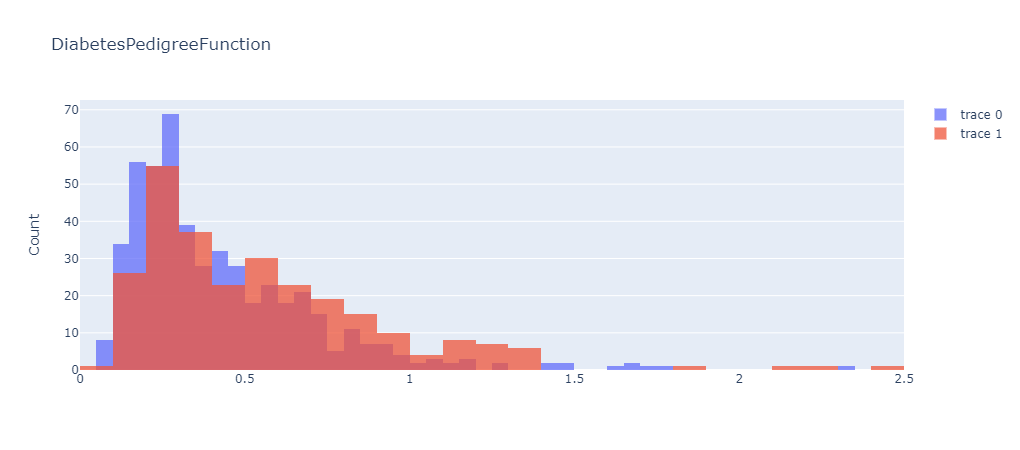

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Outcome mean :  0.3489583333333333
Outcome var  :  0.22718641493055558
Outcome skew :  0.6337757030614577
Outcome kurt :  -1.5983283582089547
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-


In [194]:
plotBarCat(df,df_name[6],'Outcome')

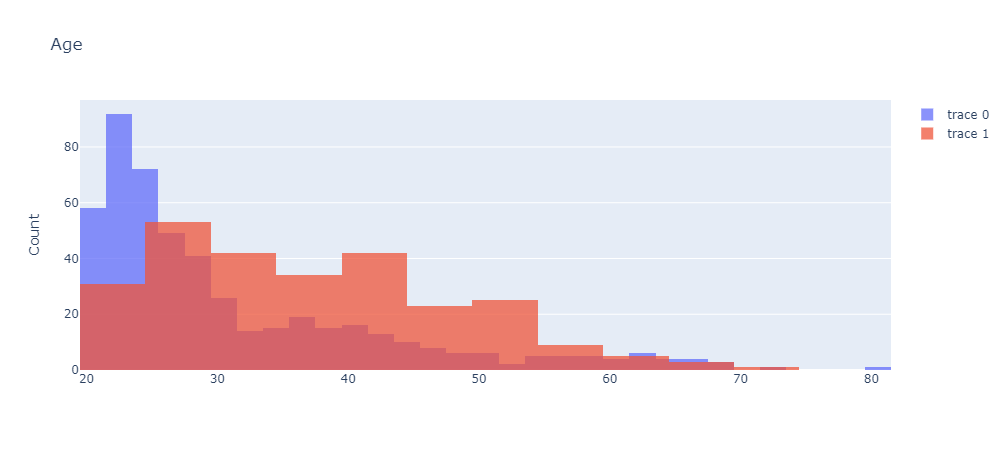

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Outcome mean :  0.3489583333333333
Outcome var  :  0.22718641493055558
Outcome skew :  0.6337757030614577
Outcome kurt :  -1.5983283582089547
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-


In [195]:
plotBarCat(df,df_name[7],'Outcome')

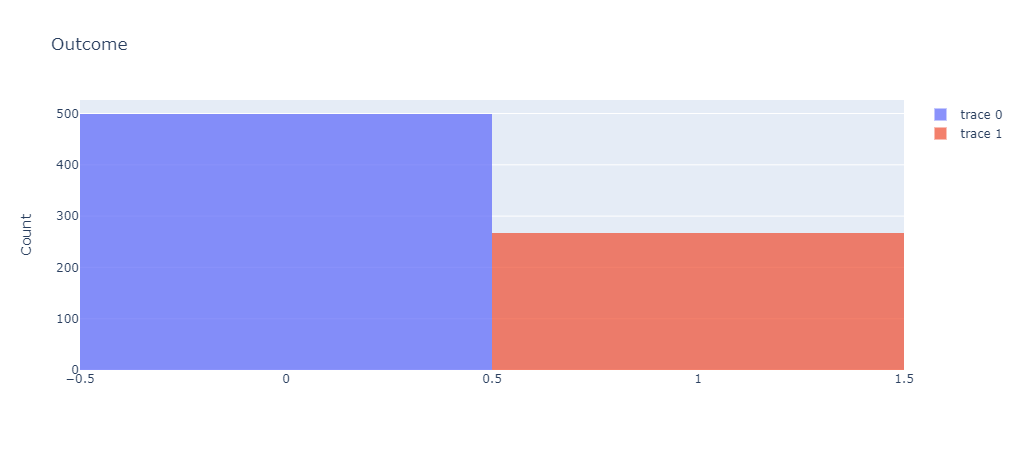

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Outcome mean :  0.3489583333333333
Outcome var  :  0.22718641493055558
Outcome skew :  0.6337757030614577
Outcome kurt :  -1.5983283582089547
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-


In [196]:
plotBarCat(df,df_name[8],'Outcome')

In [197]:
def PlotPie(df, nameOfFeature):
    labels = [str(df[nameOfFeature].unique()[i]) for i in range(df[nameOfFeature].nunique())]
    values = [df[nameOfFeature].value_counts()[i] for i in range(df[nameOfFeature].nunique())]

    trace=go.Pie(labels=labels,values=values)

    py.iplot([trace])

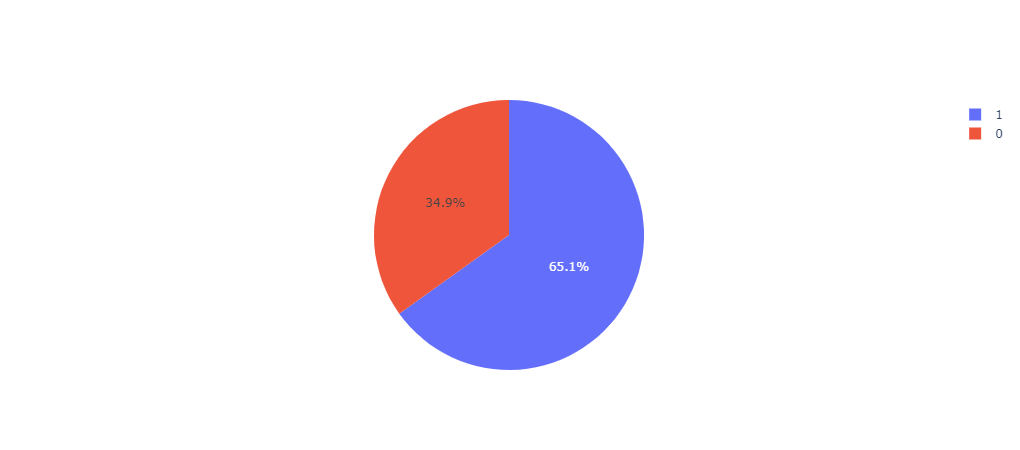

In [198]:
PlotPie(df, 'Outcome')

In the case of classification problem we alwyas need to check the target distribution.
If the distribution of target is not balance, we must treat our data more carefully.
For example we can use several methods to resampling our data. We do not resampling our data in this kernel. In addition, we need to use stratified method in our validation in order to keep the same distribution in our train and test.   

## 2.3.1 Outliers investigation

In [199]:
def OutLiersBox(df,nameOfFeature):
    
    trace0 = go.Box(
        y = df[nameOfFeature],
        name = "All Points",
        jitter = 0.3,
        pointpos = -1.8,
        boxpoints = 'all',
        marker = dict(
            color = 'rgb(7,40,89)'),
        line = dict(
            color = 'rgb(7,40,89)')
    )

    trace1 = go.Box(
        y = df[nameOfFeature],
        name = "Only Whiskers",
        boxpoints = False,
        marker = dict(
            color = 'rgb(9,56,125)'),
        line = dict(
            color = 'rgb(9,56,125)')
    )

    trace2 = go.Box(
        y = df[nameOfFeature],
        name = "Suspected Outliers",
        boxpoints = 'suspectedoutliers',
        marker = dict(
            color = 'rgb(8,81,156)',
            outliercolor = 'rgba(219, 64, 82, 0.6)',
            line = dict(
                outliercolor = 'rgba(219, 64, 82, 0.6)',
                outlierwidth = 2)),
        line = dict(
            color = 'rgb(8,81,156)')
    )

    trace3 = go.Box(
        y = df[nameOfFeature],
        name = "Whiskers and Outliers",
        boxpoints = 'outliers',
        marker = dict(
            color = 'rgb(107,174,214)'),
        line = dict(
            color = 'rgb(107,174,214)')
    )

    data = [trace0,trace1,trace2,trace3]

    layout = go.Layout(
        title = "{} Outliers".format(nameOfFeature)
    )

    fig = go.Figure(data=data,layout=layout)
    py.iplot(fig, filename = "Outliers")
    


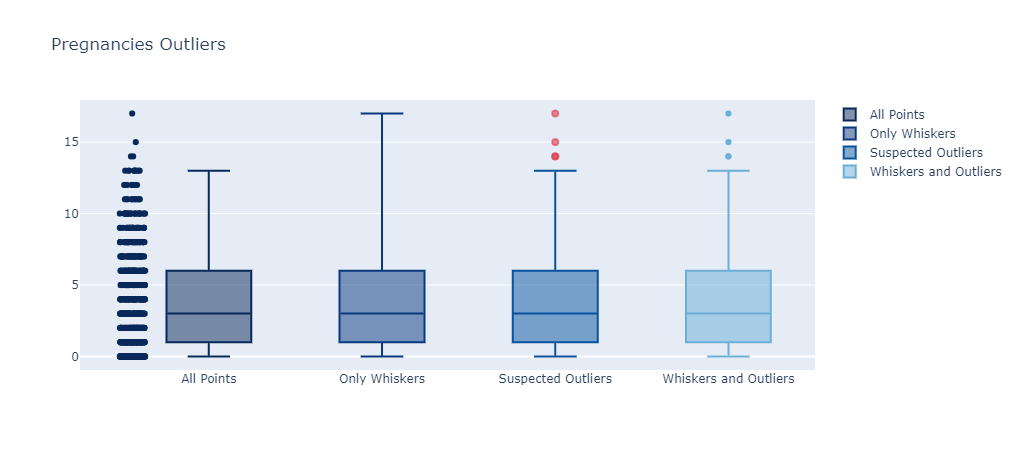

In [200]:
OutLiersBox(df,df_name[0])

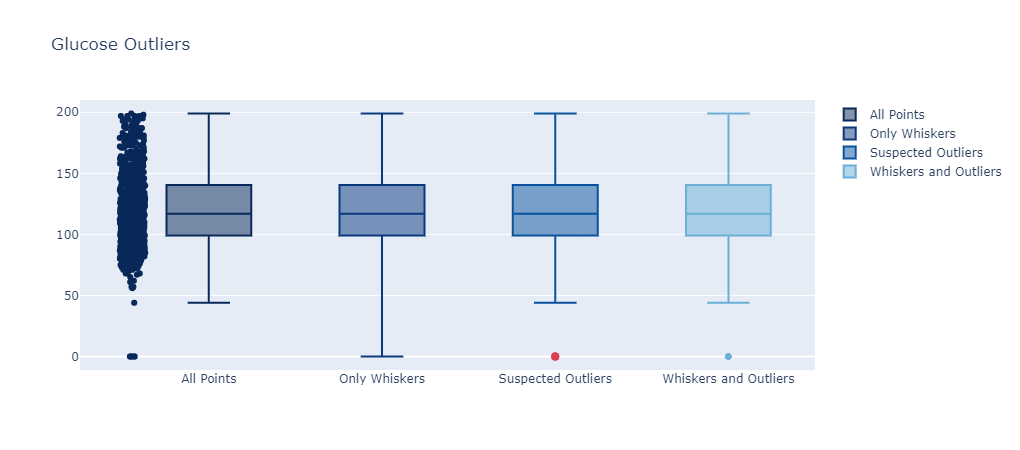

In [201]:
OutLiersBox(df,df_name[1])

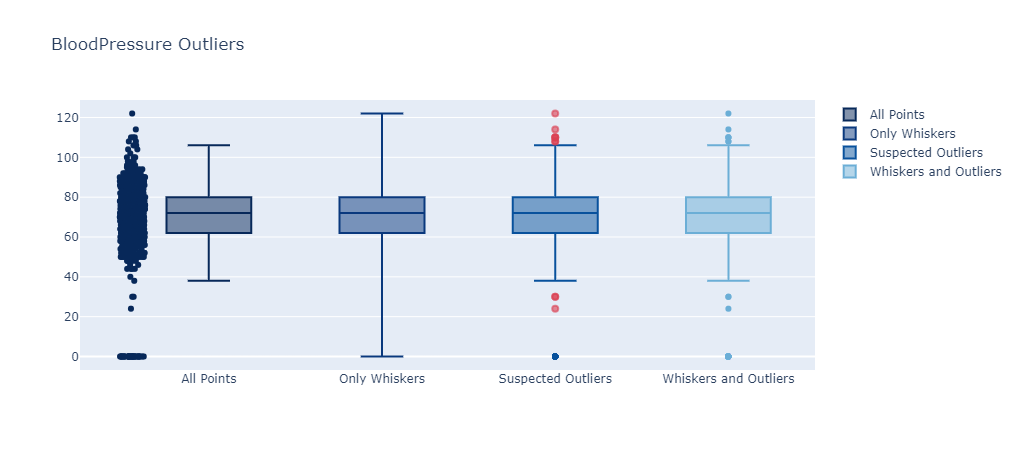

In [202]:
OutLiersBox(df,df_name[2])

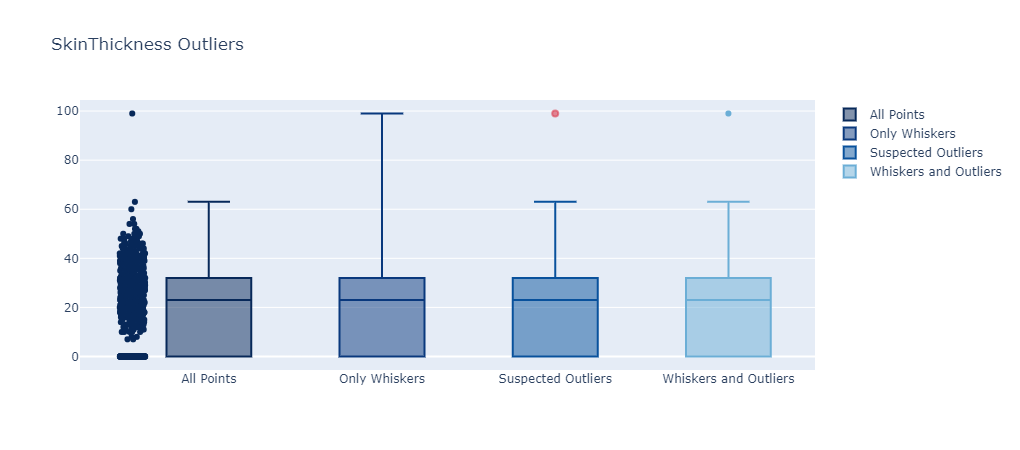

In [203]:
OutLiersBox(df,df_name[3])

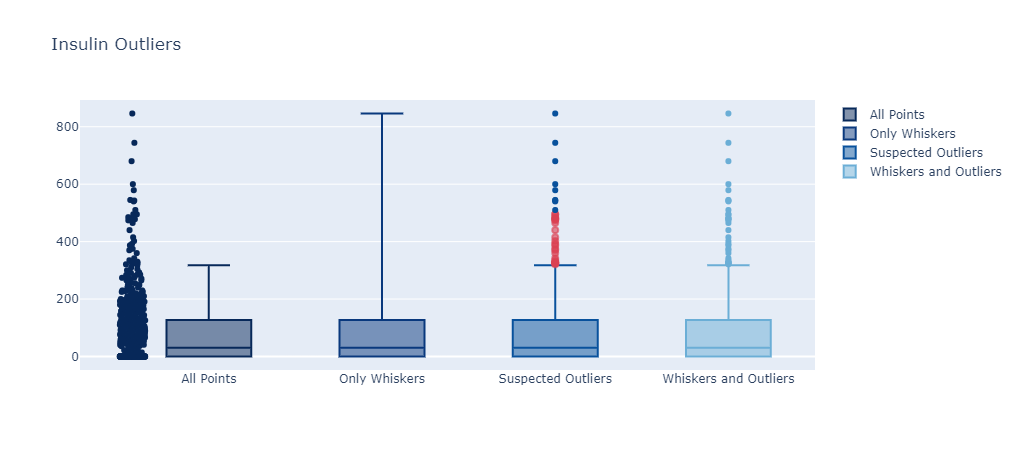

In [204]:
OutLiersBox(df,df_name[4])

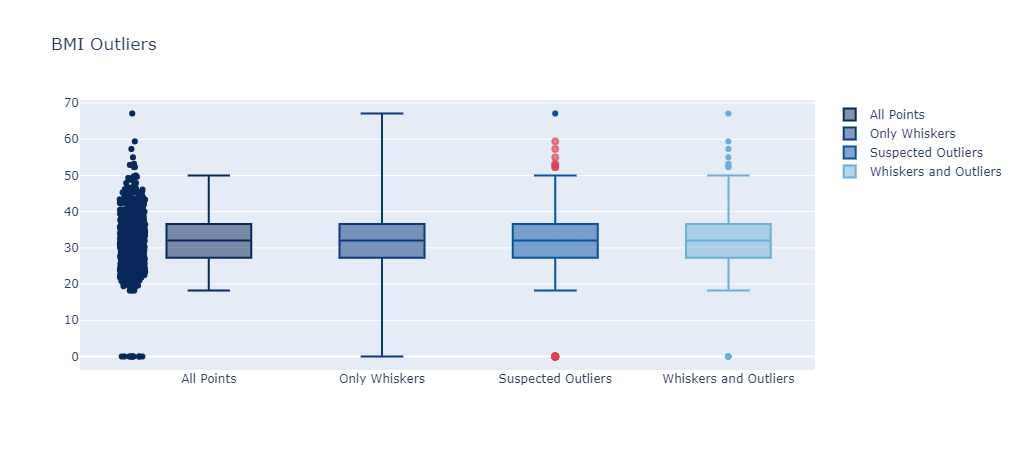

In [205]:
OutLiersBox(df,df_name[5])

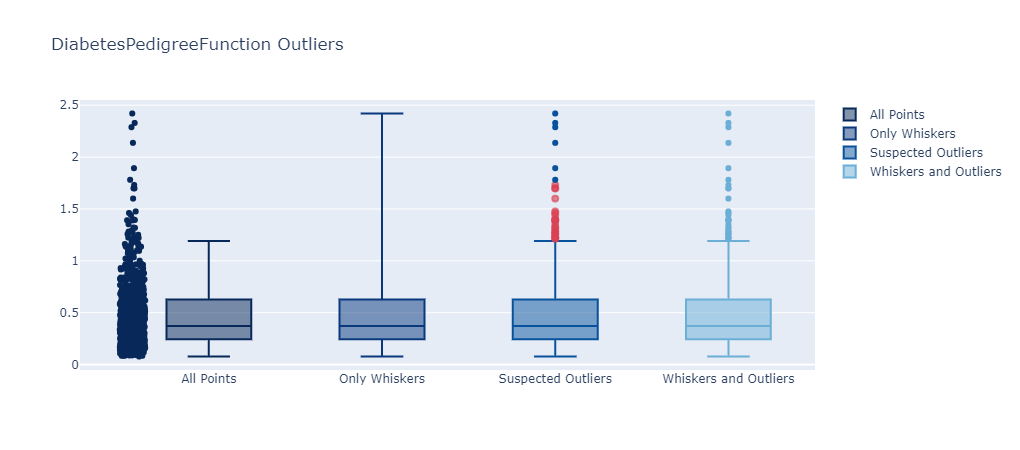

In [206]:
OutLiersBox(df,df_name[6])

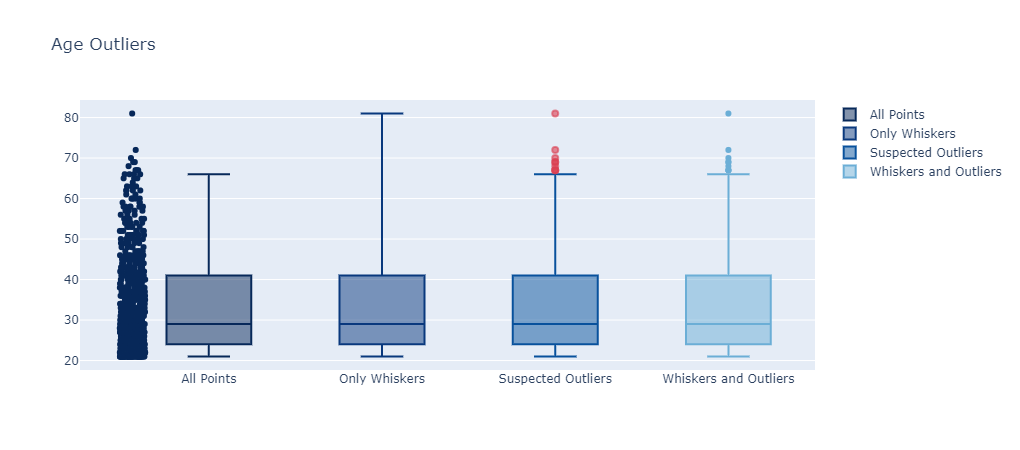

In [207]:
OutLiersBox(df,df_name[7])

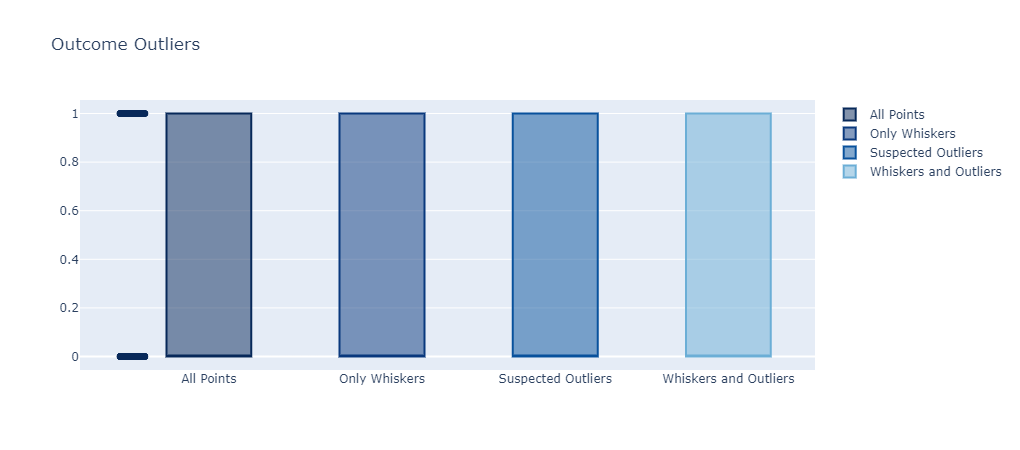

In [208]:
OutLiersBox(df,df_name[8])

## 2.3.2. Outliers investigation Pairs

In [ ]:
 from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.font_manager
 
from sklearn import svm
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

def OutLierDetection(df, feature1, feature2, outliers_fraction=.1):
    new_df = df.copy()
    rng = np.random.RandomState(42)

    # Example settings
    n_samples = new_df.shape[0]
    clusters_separation = [0]

    # define two outlier detection tools to be compared
    classifiers = {
        "One-Class SVM": svm.OneClassSVM(nu=0.95 * outliers_fraction + 0.05,
                                         kernel="rbf", gamma=0.1),
        "Robust covariance": EllipticEnvelope(contamination=outliers_fraction),
        "Isolation Forest": IsolationForest(max_samples=n_samples,
                                            contamination=outliers_fraction,
                                            random_state=rng),
        "Local Outlier Factor": LocalOutlierFactor(
            n_neighbors=35,
            contamination=outliers_fraction)}

    xx, yy = np.meshgrid(np.linspace(new_df[feature1].min() - new_df[feature1].min() * 10 / 100,
                                     new_df[feature1].max() + new_df[feature1].max() * 10 / 100, 50),
                         np.linspace(new_df[feature2].min() - new_df[feature2].min() * 10 / 100,
                                     new_df[feature2].max() + new_df[feature2].max() * 10 / 100, 50))

    n_inliers = int((1. - outliers_fraction) * n_samples)
    n_outliers = int(outliers_fraction * n_samples)
    ground_truth = np.ones(n_samples, dtype=int)
    ground_truth[-n_outliers:] = -1

    # Fit the problem with varying cluster separation
    for i, offset in enumerate(clusters_separation):
        np.random.seed(42)
        # Data generation
        X = new_df[[feature1, feature2]].values.tolist()

        # Fit the model
        plt.figure(figsize=(9, 7))
        for i, (clf_name, clf) in enumerate(classifiers.items()):
            # fit the data and tag outliers
            if clf_name == "Local Outlier Factor":
                y_pred = clf.fit_predict(X)
                scores_pred = clf.negative_outlier_factor_
            else:
                clf.fit(X)
                scores_pred = clf.decision_function(X)
                y_pred = clf.predict(X)
            threshold = stats.scoreatpercentile(scores_pred, 100 * outliers_fraction)
            n_errors = (y_pred != ground_truth).sum()

            unique, counts = np.unique(y_pred, return_counts=True)
            print(clf_name, dict(zip(unique, counts)))

            new_df[feature1 + '_' + feature2 + clf_name] = y_pred

            # plot the levels lines and the points
            if clf_name == "Local Outlier Factor":
                Z = clf.negative_outlier_factor_
            else:
                Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            subplot = plt.subplot(2, 2, i + 1)
            subplot.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7),
                             cmap=plt.cm.Blues_r)
            a = subplot.contour(xx, yy, Z, levels=[threshold], linewidths=2, colors='red')
            subplot.contourf(xx, yy, Z, levels=[threshold, Z.max()], colors='orange')
            b = plt.scatter(new_df[feature1], new_df[feature2], c='white', s=20, edgecolor='k')

            subplot.axis('tight')
            subplot.set_xlabel("%s" % (feature1))
            plt.ylabel(feature2)
            plt.title("%d. %s (errors: %d)" % (i + 1, clf_name, n_errors))

        plt.subplots_adjust(0.04, 0.1, 0.96, 0.94, 0.1, 0.26)
    plt.show()
    return new_df

 
# Exemplary usage
tt = OutLierDetection(df, 'Pregnancies', 'BloodPressure', 0.1)

# 3.1. Evaluate Algorithms: Baseline

<a href="https://ibb.co/bWRCsS"><img src="https://preview.ibb.co/f7UAe7/validation.png" alt="validation" border="0" /></a>

- We usually devide the data to train and test set. We will not touch test set until the end of the computation and the final perpormance evaluation. Then, we can devide the train set to train and validation sets. We use the validation data set to tune the model. 

- Traditional train test method suffer from high variance test problem. It means tha by changing the test set the result of the prediction changes. To over come this problem we use k-fold validation method in our train and validation set

<img src="https://image.ibb.co/bW0oXS/kfold.png" alt="kfold" border="0" />

In [83]:
# Load libraries

from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

let's make train-validation and test data sets.
- Note that stratify is used becasue we want to keep the train and test distribution 

In [84]:
X =  df[df_name[0:8]]
Y = df[df_name[8]]
X_train, X_test, y_train, y_test =train_test_split(X,Y,
                                                   test_size=0.25,
                                                   random_state=0,
                                                   stratify=df['Outcome'])

## Spot-Check Algorithms

In [85]:
# Spot-Check Algorithms
def GetBasedModel():
    basedModels = []
    basedModels.append(('LR'   , LogisticRegression()))
    basedModels.append(('LDA'  , LinearDiscriminantAnalysis()))
    basedModels.append(('KNN'  , KNeighborsClassifier()))
    basedModels.append(('CART' , DecisionTreeClassifier()))
    basedModels.append(('NB'   , GaussianNB()))
    basedModels.append(('SVM'  , SVC(probability=True)))
    basedModels.append(('AB'   , AdaBoostClassifier()))
    basedModels.append(('GBM'  , GradientBoostingClassifier()))
    basedModels.append(('RF'   , RandomForestClassifier()))
    basedModels.append(('ET'   , ExtraTreesClassifier()))

    
    return basedModels

In [86]:
def BasedLine2(X_train, y_train,models):
    # Test options and evaluation metric
    num_folds = 10
    scoring = 'accuracy'

    results = []
    names = []
    for name, model in models:
        kfold = StratifiedKFold(n_splits=num_folds, random_state=SEED)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
    return names, results

In [90]:
class PlotBoxR(object):
    
    
    def __Trace(self,nameOfFeature,value): 
    
        trace = go.Box(
            y=value,
            name = nameOfFeature,
            marker = dict(
                color = 'rgb(0, 128, 128)',
            )
        )
        return trace

    def PlotResult(self,names,results):
        
        data = []

        for i in range(len(names)):
            data.append(self.__Trace(names[i],results[i]))


        py.iplot(data)

LR: 0.765698729582577 (0.052864564181628854)
LDA: 0.7708408953418028 (0.06116571300708464)
KNN: 0.6945553539019964 (0.06369891218398553)
CART: 0.6912583182093164 (0.05188274998371423)
NB: 0.7433151845130067 (0.052375796123184)
SVM: 0.7449183303085299 (0.04575339841385951)
AB: 0.736206896551724 (0.04701938898464663)
GBM: 0.7516938898971566 (0.04455104134629946)
RF: 0.7482758620689656 (0.053029867491618254)
ET: 0.7483666061705989 (0.05898931984630207)


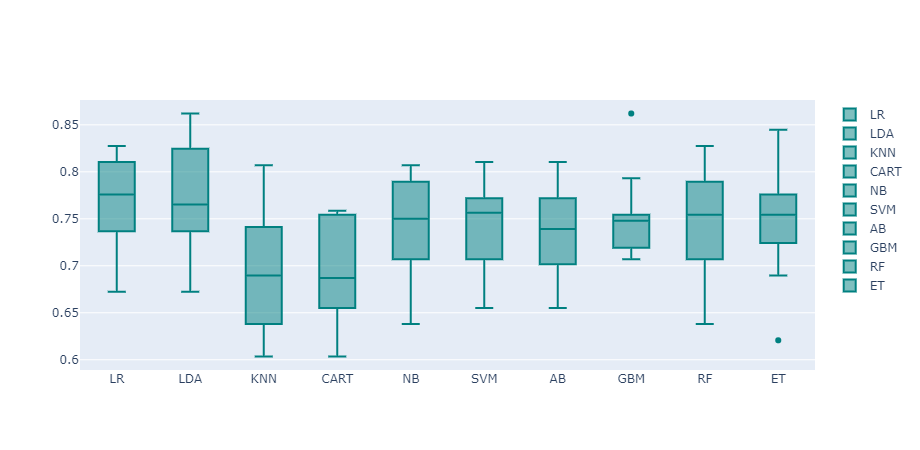

In [91]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier

# Define a function to get a list of baseline models
def GetBasedModel():
    models = []
    models.append(('LR', LogisticRegression()))
    models.append(('LDA', LinearDiscriminantAnalysis()))
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('CART', DecisionTreeClassifier()))
    models.append(('NB', GaussianNB()))
    models.append(('SVM', SVC(probability=True)))
    models.append(('AB', AdaBoostClassifier()))
    models.append(('GBM', GradientBoostingClassifier()))
    models.append(('RF', RandomForestClassifier()))
    models.append(('ET', ExtraTreesClassifier()))
    return models

# Define a function to perform cross-validation and get results
def BasedLine2(X_train, y_train, models):
    results = []
    names = []
    num_folds = 10  # Number of folds for cross-validation

    for name, model in models:
        kfold = StratifiedKFold(n_splits=num_folds, random_state=42, shuffle=True)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
        results.append(cv_results)
        names.append(name)
        msg = f"{name}: {cv_results.mean()} ({cv_results.std()})"
        print(msg)
    return names, results

# Example usage:
# X_train and y_train should be your training data and labels
models = GetBasedModel()
names, results = BasedLine2(X_train, y_train, models)
PlotBoxR().PlotResult(names, results)


In [93]:
def ScoreDataFrame(names,results):
    def floatingDecimals(f_val, dec=3):
        prc = "{:."+str(dec)+"f}" 
    
        return float(prc.format(f_val))

    scores = []
    for r in results:
        scores.append(floatingDecimals(r.mean(),4))

    scoreDataFrame = pd.DataFrame({'Model':names, 'Score': scores})
    return scoreDataFrame

In [94]:
basedLineScore = ScoreDataFrame(names,results)
basedLineScore

Model   Score
0    LR  0.7657
1   LDA  0.7708
2   KNN  0.6946
3  CART  0.6913
4    NB  0.7433
5   SVM  0.7449
6    AB  0.7362
7   GBM  0.7517
8    RF  0.7483
9    ET  0.7484

# Feature Engineering
## 4.1. Data Preprocessig

Numerical features preprocessing is different for tree and non tree model.

1) Usually:
- Tree based models does not depend on scaling
- Non-tree based models hugely depend on scaling 

2) Most Often used preprocening are:
- MinMax scaler to [0,1]
- Standard Scaler to mean = 0 and std =1
- Rank (We do not work on it in this data set)
- Using np.log(1+data),  np.sqrt(data) and stats.boxcox(data) (for exp dependency)

let's try some of them and see how our model prediction change by scalling


In [97]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


def GetScaledModel(nameOfScaler):
    
    if nameOfScaler == 'standard':
        scaler = StandardScaler()
    elif nameOfScaler =='minmax':
        scaler = MinMaxScaler()

    pipelines = []
    pipelines.append((nameOfScaler+'LR'  , Pipeline([('Scaler', scaler),('LR'  , LogisticRegression())])))
    pipelines.append((nameOfScaler+'LDA' , Pipeline([('Scaler', scaler),('LDA' , LinearDiscriminantAnalysis())])))
    pipelines.append((nameOfScaler+'KNN' , Pipeline([('Scaler', scaler),('KNN' , KNeighborsClassifier())])))
    pipelines.append((nameOfScaler+'CART', Pipeline([('Scaler', scaler),('CART', DecisionTreeClassifier())])))
    pipelines.append((nameOfScaler+'NB'  , Pipeline([('Scaler', scaler),('NB'  , GaussianNB())])))
    pipelines.append((nameOfScaler+'SVM' , Pipeline([('Scaler', scaler),('SVM' , SVC())])))
    pipelines.append((nameOfScaler+'AB'  , Pipeline([('Scaler', scaler),('AB'  , AdaBoostClassifier())])  ))
    pipelines.append((nameOfScaler+'GBM' , Pipeline([('Scaler', scaler),('GMB' , GradientBoostingClassifier())])  ))
    pipelines.append((nameOfScaler+'RF'  , Pipeline([('Scaler', scaler),('RF'  , RandomForestClassifier())])  ))
    pipelines.append((nameOfScaler+'ET'  , Pipeline([('Scaler', scaler),('ET'  , ExtraTreesClassifier())])  ))


    return pipelines 

Sometime saling help to improve the prediction of tree based model so let's see

### 4.1.2. Standard

standardLR: 0.7691167574107683 (0.057799877215204506)
standardLDA: 0.7708408953418028 (0.06116571300708464)
standardKNN: 0.6963097398669087 (0.06806587304939322)
standardCART: 0.6843315184513007 (0.046243931788995635)
standardNB: 0.7433151845130067 (0.052375796123184)
standardSVM: 0.7448880822746522 (0.07168301575807735)
standardAB: 0.736206896551724 (0.04701938898464663)
standardGBM: 0.7534180278281911 (0.04641487617244062)
standardRF: 0.7395341802782819 (0.055281201121585494)
standardET: 0.7483061101028433 (0.05230032009417441)


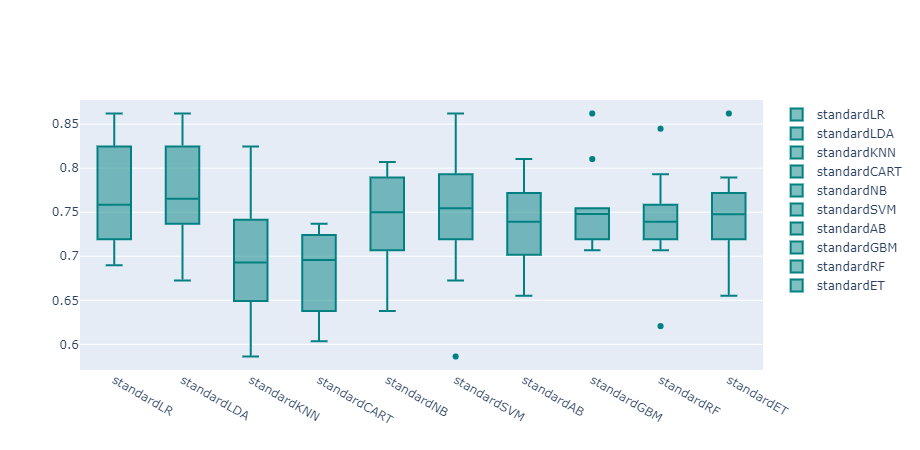

Model   Score         Model   Score
0    LR  0.7657    standardLR  0.7691
1   LDA  0.7708   standardLDA  0.7708
2   KNN  0.6946   standardKNN  0.6963
3  CART  0.6913  standardCART  0.6843
4    NB  0.7433    standardNB  0.7433
5   SVM  0.7449   standardSVM  0.7449
6    AB  0.7362    standardAB  0.7362
7   GBM  0.7517   standardGBM  0.7534
8    RF  0.7483    standardRF  0.7395
9    ET  0.7484    standardET  0.7483

In [98]:
models = GetScaledModel('standard')
names,results = BasedLine2(X_train, y_train,models)
PlotBoxR().PlotResult(names,results)
scaledScoreStandard = ScoreDataFrame(names,results)
compareModels = pd.concat([basedLineScore,
                           scaledScoreStandard], axis=1)
compareModels

### 4.1.2. MinMax

minmaxLR: 0.7656382335148215 (0.04530279045226566)
minmaxLDA: 0.7708408953418028 (0.06116571300708464)
minmaxKNN: 0.7065335753176044 (0.061022782672673706)
minmaxCART: 0.7016031457955233 (0.03432059010941027)
minmaxNB: 0.7433151845130067 (0.052375796123184)
minmaxSVM: 0.7535087719298245 (0.058442371773188354)
minmaxAB: 0.7379612825166364 (0.04861961927623402)
minmaxGBM: 0.7568663036902601 (0.04865399775202329)
minmaxRF: 0.7498185117967331 (0.05168882766117616)
minmaxET: 0.7274349667271627 (0.04163088890741539)


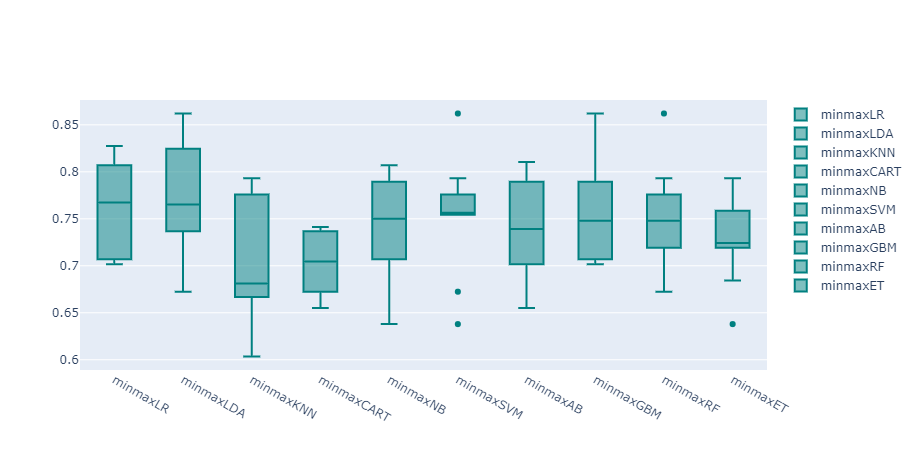

Model   Score         Model   Score       Model   Score
0    LR  0.7657    standardLR  0.7691    minmaxLR  0.7656
1   LDA  0.7708   standardLDA  0.7708   minmaxLDA  0.7708
2   KNN  0.6946   standardKNN  0.6963   minmaxKNN  0.7065
3  CART  0.6913  standardCART  0.6843  minmaxCART  0.7016
4    NB  0.7433    standardNB  0.7433    minmaxNB  0.7433
5   SVM  0.7449   standardSVM  0.7449   minmaxSVM  0.7535
6    AB  0.7362    standardAB  0.7362    minmaxAB  0.7380
7   GBM  0.7517   standardGBM  0.7534   minmaxGBM  0.7569
8    RF  0.7483    standardRF  0.7395    minmaxRF  0.7498
9    ET  0.7484    standardET  0.7483    minmaxET  0.7274

In [99]:
models = GetScaledModel('minmax')
names,results = BasedLine2(X_train, y_train,models)
PlotBoxR().PlotResult(names,results)

scaledScoreMinMax = ScoreDataFrame(names,results)
compareModels = pd.concat([basedLineScore,
                           scaledScoreStandard,
                          scaledScoreMinMax], axis=1)
compareModels

As we can see, the standarscaler and min and max effect on non tree models and the prediction results improve 

## 4.2. Remove Outliers

let's remove outliers and see how it effects on the prediction

In [45]:
df_t = df.copy()
df_t_name = df_t.columns

In [46]:
def TurkyOutliers(df_out,nameOfFeature,drop=False):

    valueOfFeature = df_out[nameOfFeature]
    # Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(valueOfFeature, 25.)

    # Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(valueOfFeature, 75.)

    # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3-Q1)*1.5
    # print "Outlier step:", step
    outliers = valueOfFeature[~((valueOfFeature >= Q1 - step) & (valueOfFeature <= Q3 + step))].index.tolist()
    feature_outliers = valueOfFeature[~((valueOfFeature >= Q1 - step) & (valueOfFeature <= Q3 + step))].values
    # df[~((df[nameOfFeature] >= Q1 - step) & (df[nameOfFeature] <= Q3 + step))]


    # Remove the outliers, if any were specified
    print ("Number of outliers (inc duplicates): {} and outliers: {}".format(len(outliers), feature_outliers))
    if drop:
        good_data = df_out.drop(df_out.index[outliers]).reset_index(drop = True)
        print ("New dataset with removed outliers has {} samples with {} features each.".format(*good_data.shape))
        return good_data
    else: 
        print ("Nothing happens, df.shape = ",df_out.shape)
        return df_out

### Feature 0

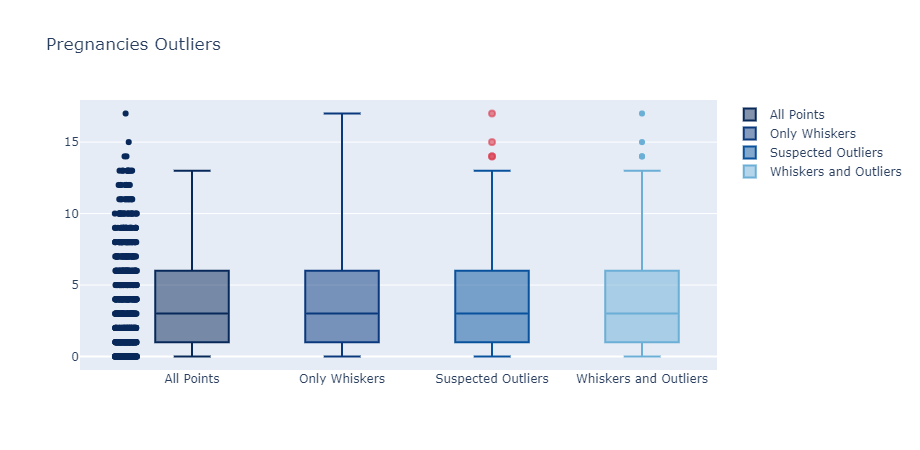

In [47]:

feature_number = 0
OutLiersBox(df,df_name[feature_number])


Number of outliers (inc duplicates): 4 and outliers: [15 17 14 14]
New dataset with removed outliers has 764 samples with 9 features each.


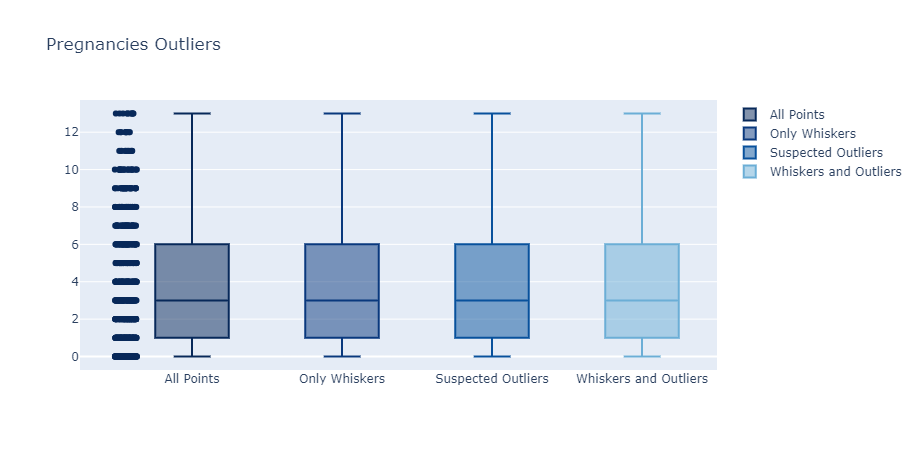

In [49]:
df_clean = TurkyOutliers(df_t,df_name[feature_number],True)
OutLiersBox(df_clean,df_name[feature_number])

### Feature 1

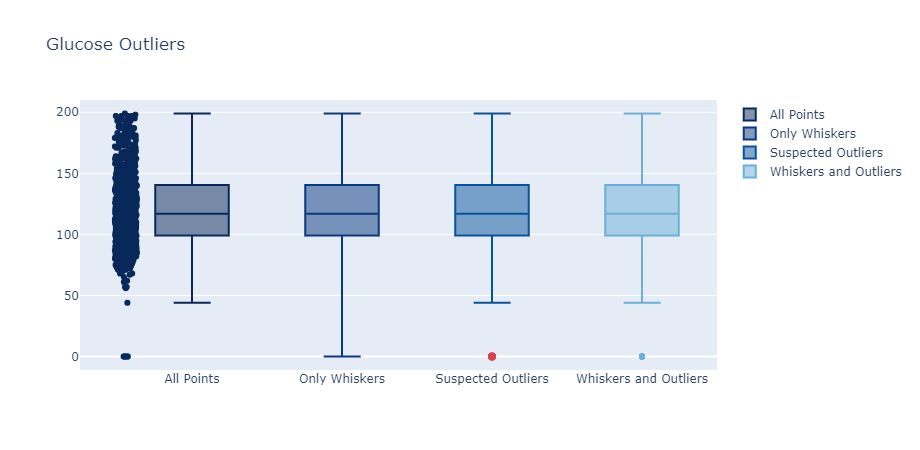

In [50]:
feature_number = 1
OutLiersBox(df,df_name[feature_number])

Number of outliers (inc duplicates): 5 and outliers: [0 0 0 0 0]
New dataset with removed outliers has 759 samples with 9 features each.


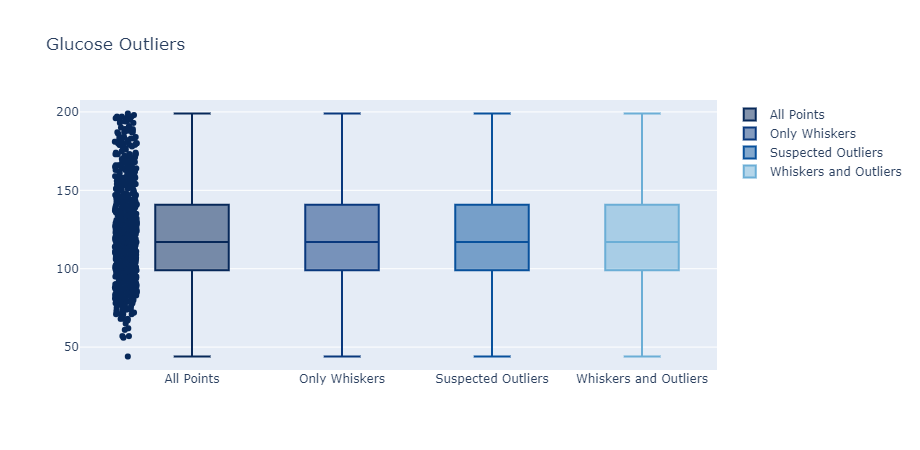

In [51]:
df_clean = TurkyOutliers(df_clean,df_name[feature_number],True)
OutLiersBox(df_clean,df_name[feature_number])

### Feature 2

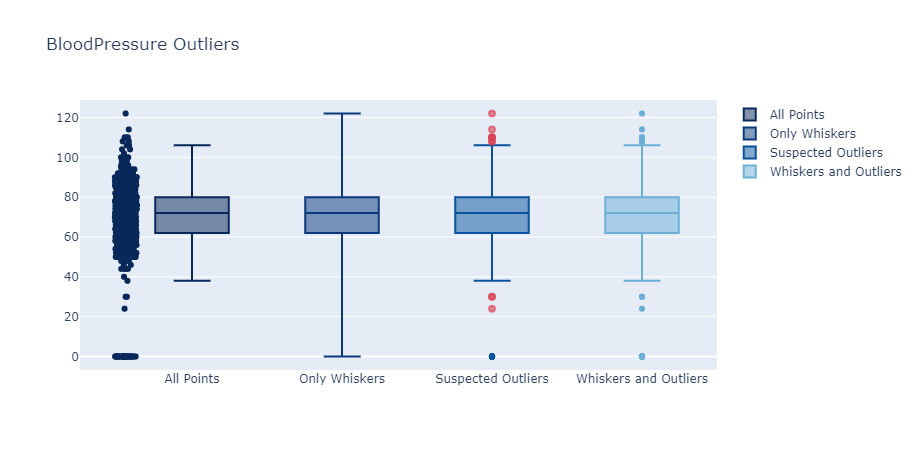

In [52]:
feature_number = 2
OutLiersBox(df,df_name[feature_number])

Number of outliers (inc duplicates): 45 and outliers: [  0   0  30 110   0   0   0   0 108 122  30   0 110   0   0   0   0   0
   0   0   0   0   0 108   0   0   0   0   0   0   0   0   0   0 110   0
  24   0   0   0   0 114   0   0   0]
New dataset with removed outliers has 714 samples with 9 features each.


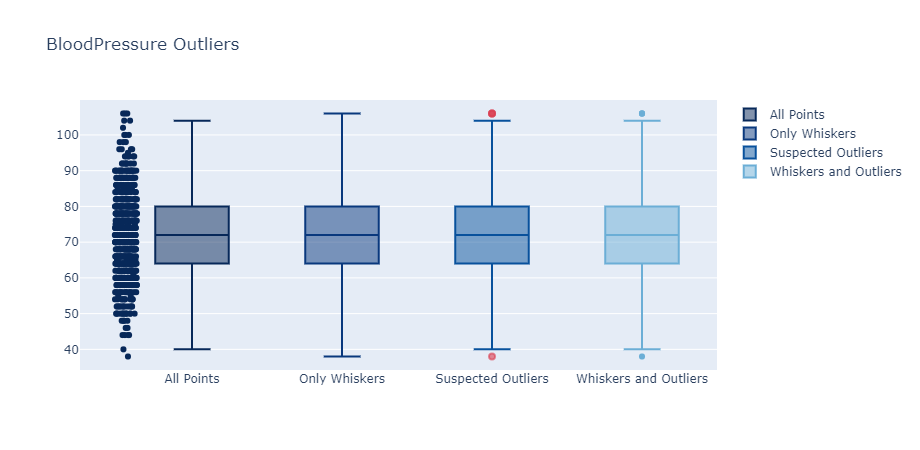

In [53]:
df_clean = TurkyOutliers(df_clean,df_name[feature_number],True)
OutLiersBox(df_clean,df_name[feature_number])

### Feature 3

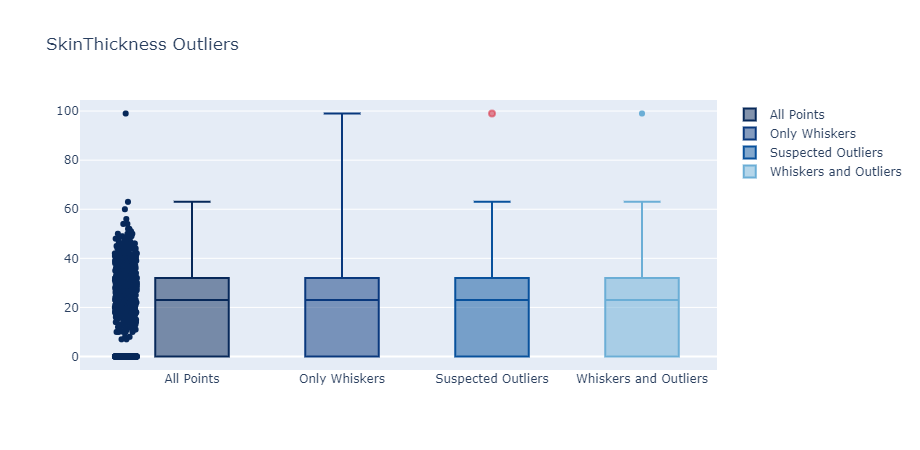

In [54]:
feature_number = 3
OutLiersBox(df,df_name[feature_number])

Number of outliers (inc duplicates): 1 and outliers: [99]
New dataset with removed outliers has 713 samples with 9 features each.


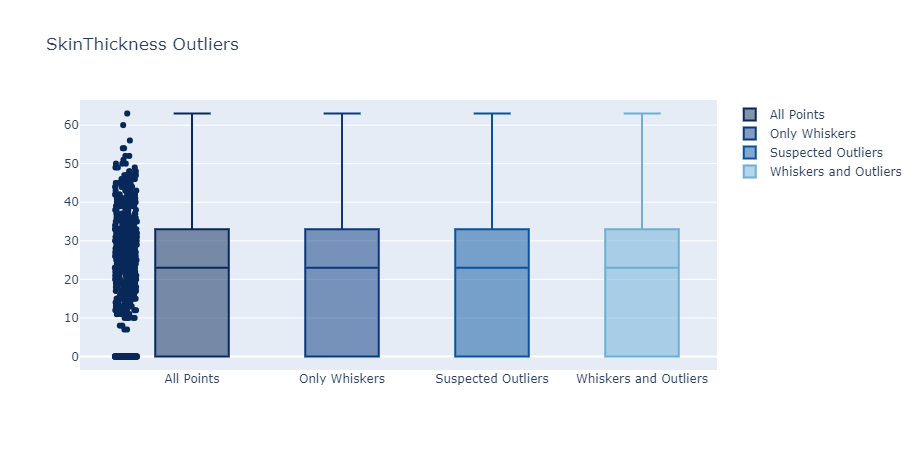

In [55]:
df_clean = TurkyOutliers(df_clean,df_name[feature_number],True)
OutLiersBox(df_clean,df_name[feature_number])

### Feature 4

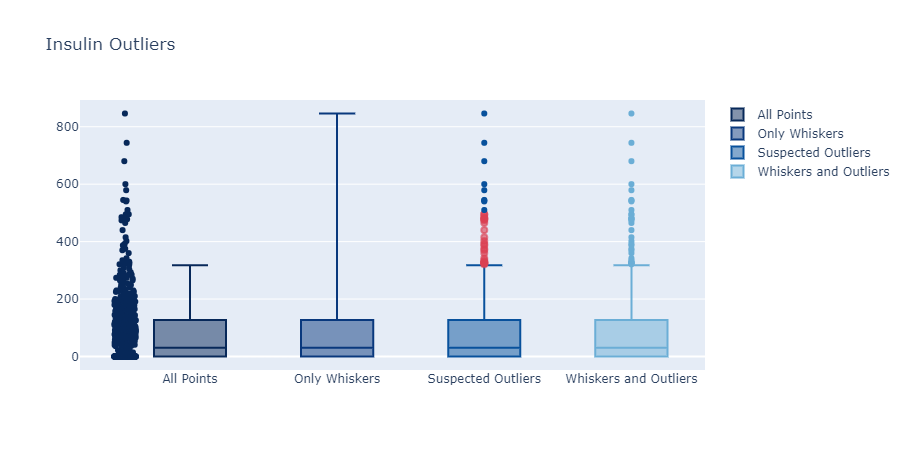

In [56]:
feature_number = 4
OutLiersBox(df,df_name[feature_number])

Number of outliers (inc duplicates): 27 and outliers: [543 846 342 495 485 495 478 744 370 680 402 375 545 360 465 415 579 474
 480 600 440 540 480 335 387 392 510]
New dataset with removed outliers has 686 samples with 9 features each.


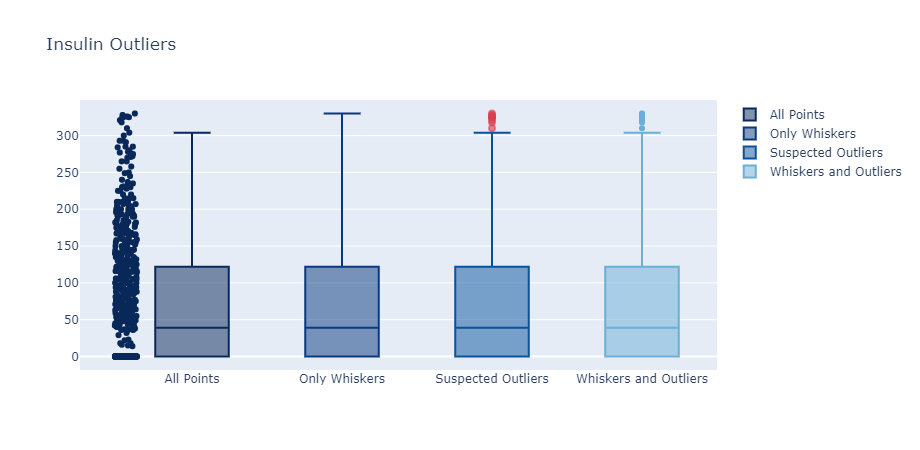

In [57]:
df_clean = TurkyOutliers(df_clean,df_name[4],True)
OutLiersBox(df_clean,df_name[4])

### Feature 5

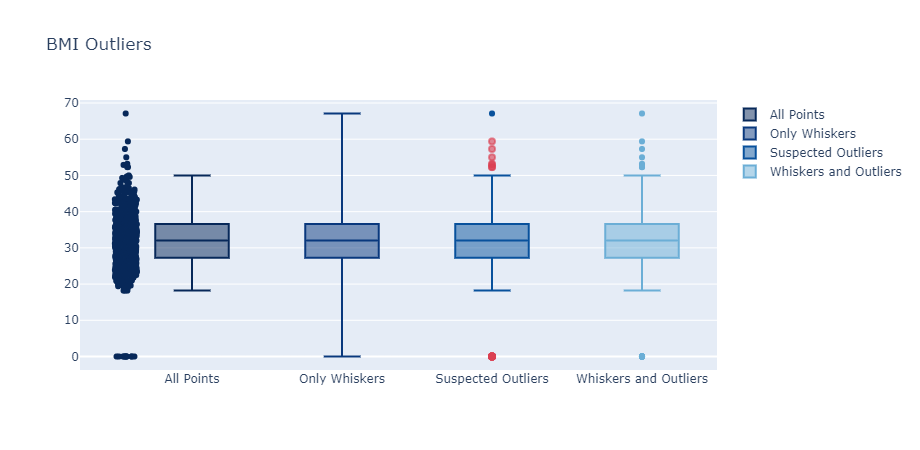

In [58]:
feature_number = 5
OutLiersBox(df,df_name[feature_number])

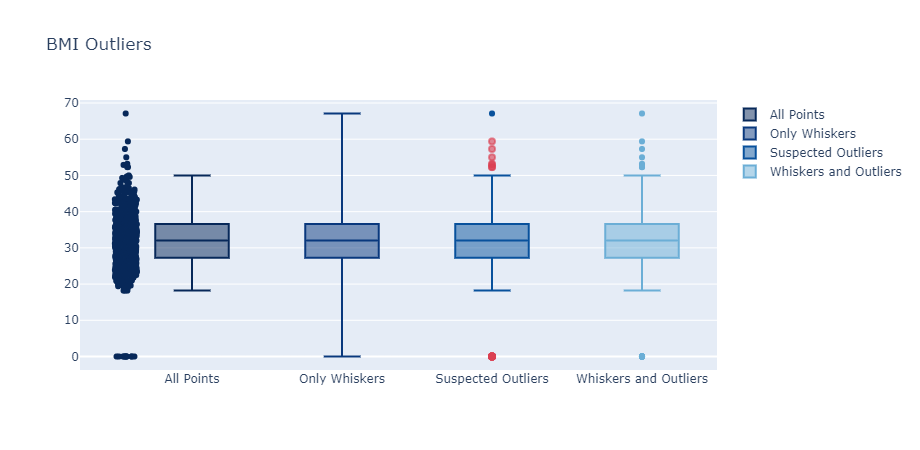

In [59]:
feature_number = 5
OutLiersBox(df,df_name[feature_number])

Number of outliers (inc duplicates): 10 and outliers: [ 0.  49.7 53.2  0.  50.  52.9  0.  59.4 57.3  0. ]
New dataset with removed outliers has 676 samples with 9 features each.


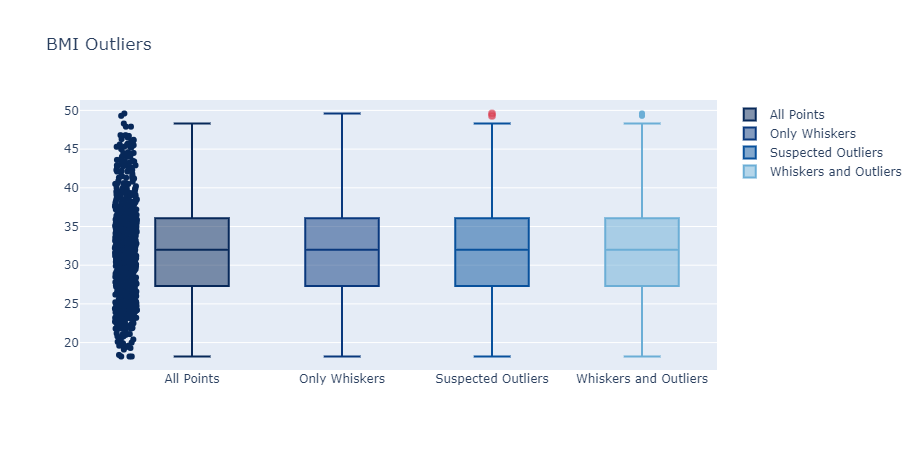

In [60]:
df_clean = TurkyOutliers(df_clean,df_name[feature_number],True)
OutLiersBox(df_clean,df_name[feature_number])

### Feature 6

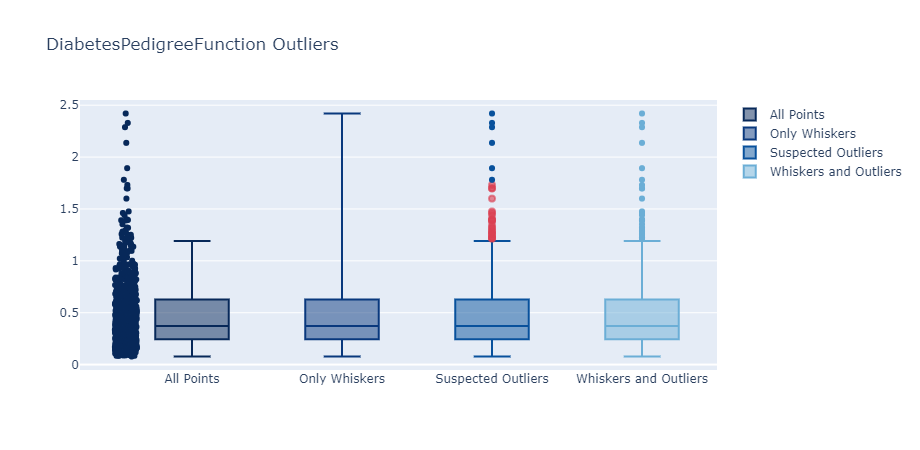

In [61]:
feature_number = 6
OutLiersBox(df,df_name[feature_number])

Number of outliers (inc duplicates): 29 and outliers: [2.288 1.441 1.39  1.893 1.781 1.222 1.4   1.189 1.321 1.224 1.318 1.213
 1.353 1.224 1.391 1.476 1.268 1.6   1.191 1.251 1.699 1.258 1.282 1.698
 1.461 1.292 1.394 1.174 1.182]
New dataset with removed outliers has 647 samples with 9 features each.


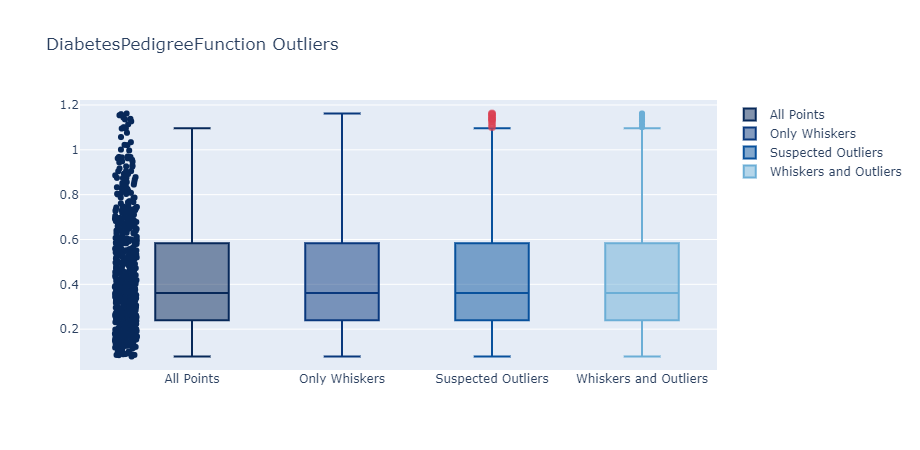

In [62]:
df_clean = TurkyOutliers(df_clean,df_name[feature_number],True)
OutLiersBox(df_clean,df_name[feature_number])

### Feature 7

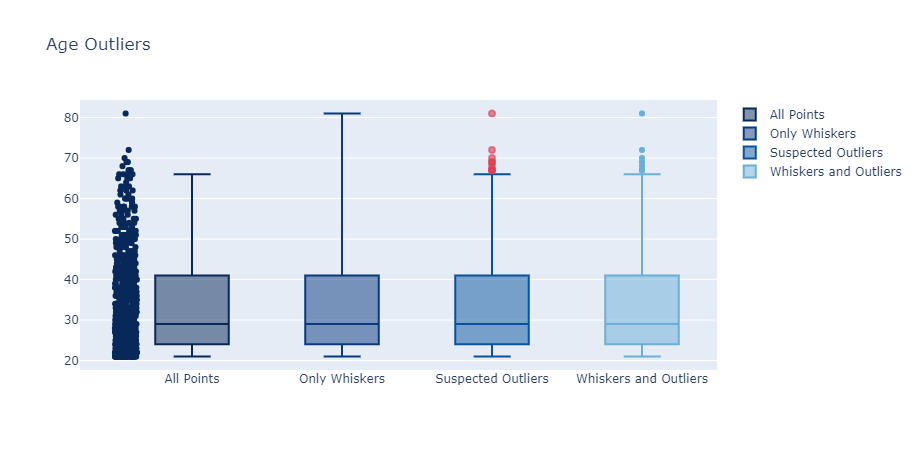

In [63]:
feature_number = 7
OutLiersBox(df,df_name[feature_number])

Number of outliers (inc duplicates): 11 and outliers: [69 66 67 81 67 66 67 66 70 68 66]
New dataset with removed outliers has 636 samples with 9 features each.


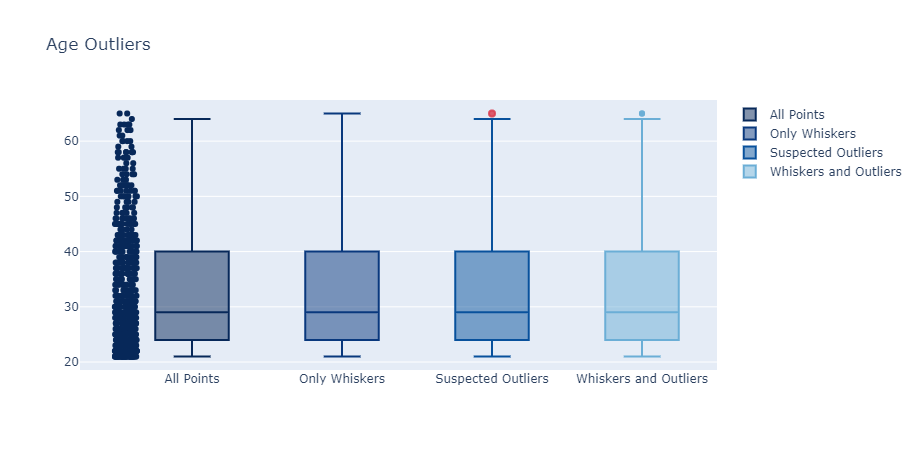

In [64]:
df_clean = TurkyOutliers(df_clean,df_name[feature_number],True)
OutLiersBox(df_clean,df_name[feature_number])

### Feature 8 

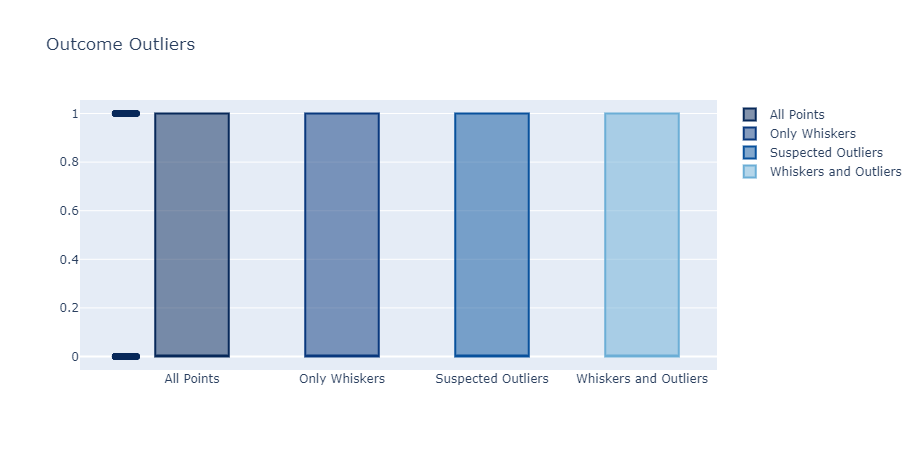

In [65]:
feature_number = 8
OutLiersBox(df,df_name[feature_number])

Number of outliers (inc duplicates): 0 and outliers: []
New dataset with removed outliers has 636 samples with 9 features each.


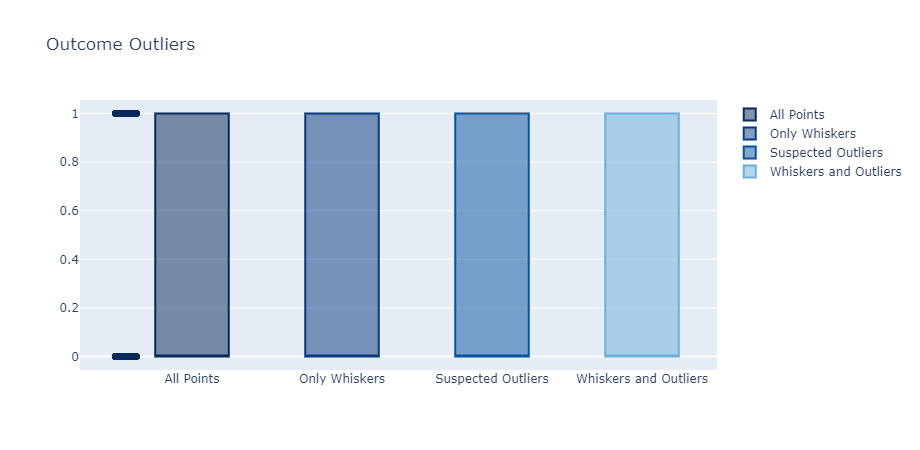

In [66]:
df_clean = TurkyOutliers(df_clean,df_name[feature_number],True)
OutLiersBox(df_clean,df_name[feature_number])

** Cleaning Report **

In [67]:
print('df shape: {}, new df shape: {}, we lost {} rows, {}% of our data'.format(df.shape[0],df_clean.shape[0],
                                                              df.shape[0]-df_clean.shape[0],
                                                        (df.shape[0]-df_clean.shape[0])/df.shape[0]*100))

df shape: 768, new df shape: 636, we lost 132 rows, 17.1875% of our data


In [76]:
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor

# قراءة البيانات إذا لم يتم ذلك بالفعل
# df = pd.read_csv("ملف_البيانات.csv")

def OutLierDetection(df, col1, col2, contamination):
    # استخراج البيانات من الأعمدة المحددة
    X = df[[col1, col2]].values
    
    # إنشاء كائن LOF مع عدد الجيران ونسبة الاختلاط المطلوبة
    clf = LocalOutlierFactor(n_neighbors=20, contamination=contamination)
    
    # استخدام الدالة fit_predict للعثور على القيم الشاذة (-1 للقيم الشاذة و 1 للقيم غير الشاذة)
    outlier_scores = clf.fit_predict(X)
    
    return outlier_scores

# استخدام الدالة للكشف عن القيم الشاذة
tt = OutLierDetection(df, 'Pregnancies', 'BloodPressure', 0.1)

# طباعة النتائج
print(tt)


[ 1  1  1  1 -1  1  1 -1  1 -1  1  1  1  1  1 -1  1  1 -1  1  1  1  1  1
 -1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1
  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 -1  1  1  1  1  1  1  1 -1  1  1  1 -1  1 -1  1 -1  1  1  1  1  1  1  1
  1  1 -1  1  1  1 -1  1  1  1 -1  1  1  1  1  1  1  1 -1  1  1 -1  1  1
  1  1  1  1  1 -1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1 -1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1
  1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1
  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1 -1  1  1  1  1  1  1 -1  1  1  1 -1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1 -1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1

In [78]:
from sklearn.neighbors import LocalOutlierFactor

def OutLierDetection(df, col1, col2, contamination):
    X = df[[col1, col2]].values
    clf = LocalOutlierFactor(n_neighbors=20, contamination=contamination)
    # Use fit_predict to obtain outlier scores (-1 for outliers, 1 for inliers)
    outlier_scores = clf.fit_predict(X)
    return outlier_scores

# Example usage
tt_t = OutLierDetection(df_clean, 'Pregnancies', 'BloodPressure', 0.1)


## Comparing the accuracy of models after cleaning

In [101]:
df_clean_name = df_clean.columns
X_c =  df_clean[df_clean_name[0:8]]
Y_c = df_clean[df_clean_name[8]]
X_train_c, X_test_c, y_train_c, y_test_c =train_test_split(X_c,Y_c,
                                                   test_size=0.25,
                                                   random_state=0,
                                                   stratify=df_clean['Outcome'])

minmaxLR: 0.7716755319148936 (0.053663116730239956)
minmaxLDA: 0.7779698581560284 (0.05239108563924813)
minmaxKNN: 0.7484929078014184 (0.056285669742656155)
minmaxCART: 0.71697695035461 (0.09079097385577709)
minmaxNB: 0.7591312056737589 (0.05306212104888693)
minmaxSVM: 0.7654698581560283 (0.05809154726735462)
minmaxAB: 0.7109485815602836 (0.05608502793758436)
minmaxGBM: 0.7675975177304964 (0.0571836170918213)
minmaxRF: 0.7613475177304965 (0.051835251180314665)
minmaxET: 0.7633421985815603 (0.040633142589162265)


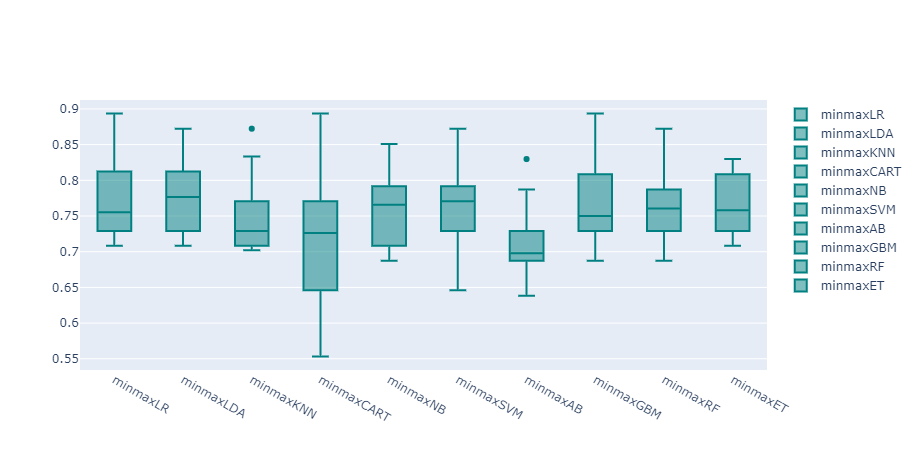

Model   Score         Model   Score       Model   Score       Model   Score
0    LR  0.7657    standardLR  0.7691    minmaxLR  0.7656    minmaxLR  0.7717
1   LDA  0.7708   standardLDA  0.7708   minmaxLDA  0.7708   minmaxLDA  0.7780
2   KNN  0.6946   standardKNN  0.6963   minmaxKNN  0.7065   minmaxKNN  0.7485
3  CART  0.6913  standardCART  0.6843  minmaxCART  0.7016  minmaxCART  0.7170
4    NB  0.7433    standardNB  0.7433    minmaxNB  0.7433    minmaxNB  0.7591
5   SVM  0.7449   standardSVM  0.7449   minmaxSVM  0.7535   minmaxSVM  0.7655
6    AB  0.7362    standardAB  0.7362    minmaxAB  0.7380    minmaxAB  0.7109
7   GBM  0.7517   standardGBM  0.7534   minmaxGBM  0.7569   minmaxGBM  0.7676
8    RF  0.7483    standardRF  0.7395    minmaxRF  0.7498    minmaxRF  0.7613
9    ET  0.7484    standardET  0.7483    minmaxET  0.7274    minmaxET  0.7633

In [103]:
models = GetScaledModel('minmax')
names,results = BasedLine2(X_train_c, y_train_c,models)
PlotBoxR().PlotResult(names,results)

scaledScoreMinMax_c = ScoreDataFrame(names,results)
compareModels = pd.concat([basedLineScore,
                           scaledScoreStandard,
                          scaledScoreMinMax,
                          scaledScoreMinMax_c], axis=1)
compareModels

It can be seen that the prediction is improving

** Now is your turn you can delete the outlier in pair plot to see how the result change and share your result in comment.**

## 4.3. Feature Selection
Feature selection is also called variable selection or attribute selection.
It is the automatic selection of attributes in your data (such as columns in tabular data) that are most relevant to the predictive modeling problem you are working on.

Feature selection methods aid you in your mission to create an accurate predictive model. They help you by choosing features that will give you as good or better accuracy whilst requiring less data.

Feature selection methods can be used to identify and remove unneeded, irrelevant and redundant attributes from data that do not contribute to the accuracy of a predictive model or may in fact decrease the accuracy of the model.

### 4.3.1. Corrolation

If we fit highly corrolated data in our model, it results in the overfitting probelm. Thus, for example if there are two highly corrolated features we have to drop the one that has more corrolation with other feature.  

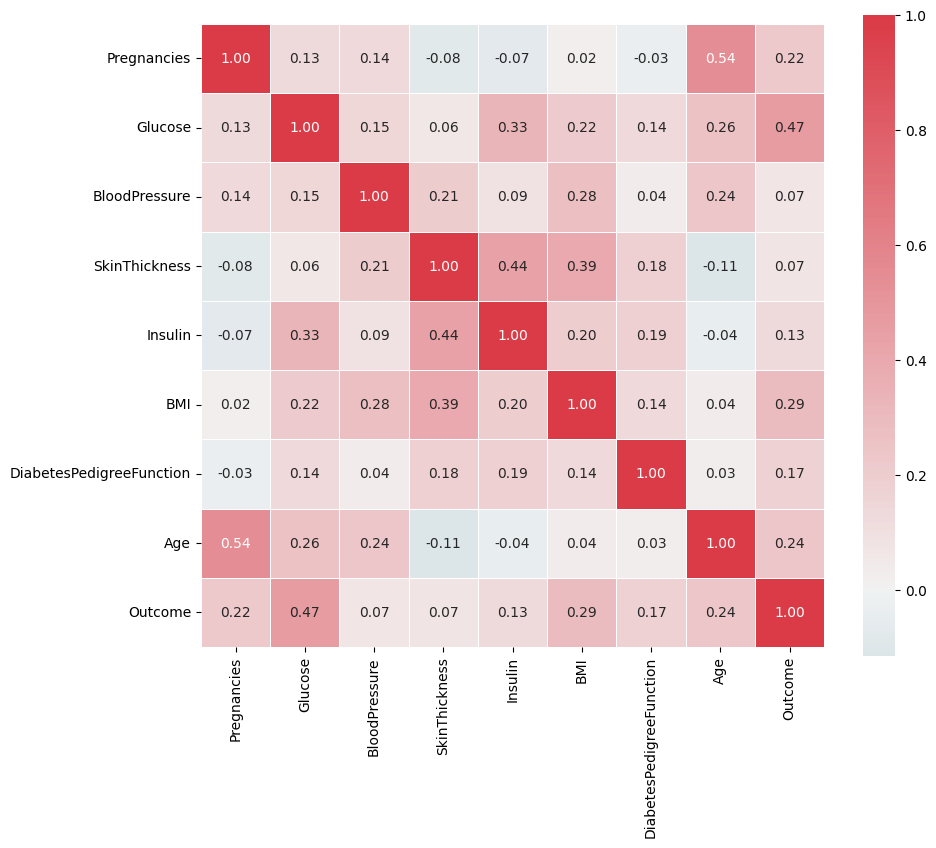

In [104]:
def HeatMap(df,x=True):
        correlations = df.corr()
        ## Create color map ranging between two colors
        cmap = sns.diverging_palette(220, 10, as_cmap=True)
        fig, ax = plt.subplots(figsize=(10, 10))
        fig = sns.heatmap(correlations, cmap=cmap, vmax=1.0, center=0, fmt='.2f',square=True, linewidths=.5, annot=x, cbar_kws={"shrink": .75})
        fig.set_xticklabels(fig.get_xticklabels(), rotation = 90, fontsize = 10)
        fig.set_yticklabels(fig.get_yticklabels(), rotation = 0, fontsize = 10)
        plt.tight_layout()
        plt.show()

HeatMap(df,x=True)

There is not highly corrolated feature in this data set.

## 4.3.2.Feature Importance
Bagged decision trees like Random Forest and Extra Trees can be used to estimate the importance of features.

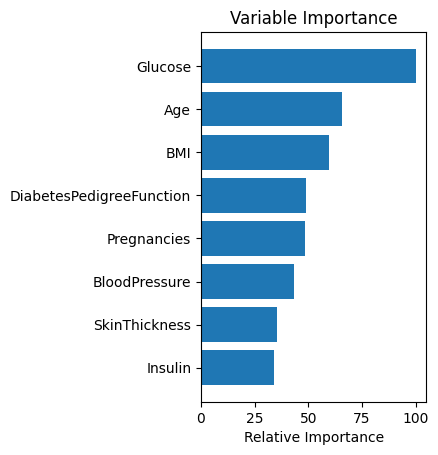

In [105]:
clf = ExtraTreesClassifier(n_estimators=250,
                              random_state=SEED)

clf.fit(X_train_c, y_train_c)

# #############################################################################
# Plot feature importance
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, df.columns[sorted_idx])#boston.feature_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [106]:
df_feature_imp=df_clean[['Glucose','BMI','Age','DiabetesPedigreeFunction','Outcome']]

In [107]:
df_feature_imp_name = df_feature_imp.columns

In [108]:
X =  df_feature_imp[df_feature_imp_name[0:df_feature_imp.shape[1]-1]]
Y = df_feature_imp[df_feature_imp_name[df_feature_imp.shape[1]-1]]
X_train_im, X_test_im, y_train_im, y_test_im =train_test_split(X,Y,
                                                   test_size=0.1,
                                                   random_state=0,
                                                   stratify=df_feature_imp['Outcome'])

minmaxLR: 0.7850272232304901 (0.02983261316541408)
minmaxLDA: 0.78502722323049 (0.03182922576552067)
minmaxKNN: 0.7833635813672112 (0.04429572315154641)
minmaxCART: 0.6957955232909862 (0.08457666702289449)
minmaxNB: 0.7815486993345433 (0.03368761977657113)
minmaxSVM: 0.7867211131276466 (0.04124182707394515)
minmaxAB: 0.7674228675136117 (0.05045503522872103)
minmaxGBM: 0.7603145795523291 (0.06708222890923336)
minmaxRF: 0.7587416817906836 (0.052404960938883784)
minmaxET: 0.7431639443436178 (0.04669741001486045)


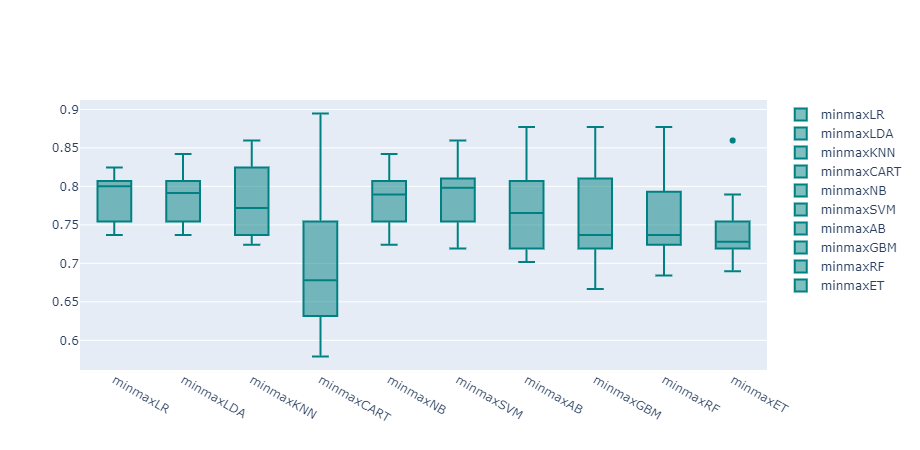

Model   Score         Model   Score       Model   Score       Model   Score  \
0    LR  0.7657    standardLR  0.7691    minmaxLR  0.7656    minmaxLR  0.7717   
1   LDA  0.7708   standardLDA  0.7708   minmaxLDA  0.7708   minmaxLDA  0.7780   
2   KNN  0.6946   standardKNN  0.6963   minmaxKNN  0.7065   minmaxKNN  0.7485   
3  CART  0.6913  standardCART  0.6843  minmaxCART  0.7016  minmaxCART  0.7170   
4    NB  0.7433    standardNB  0.7433    minmaxNB  0.7433    minmaxNB  0.7591   
5   SVM  0.7449   standardSVM  0.7449   minmaxSVM  0.7535   minmaxSVM  0.7655   
6    AB  0.7362    standardAB  0.7362    minmaxAB  0.7380    minmaxAB  0.7109   
7   GBM  0.7517   standardGBM  0.7534   minmaxGBM  0.7569   minmaxGBM  0.7676   
8    RF  0.7483    standardRF  0.7395    minmaxRF  0.7498    minmaxRF  0.7613   
9    ET  0.7484    standardET  0.7483    minmaxET  0.7274    minmaxET  0.7633   

        Model   Score  
0    minmaxLR  0.7850  
1   minmaxLDA  0.7850  
2   minmaxKNN  0.7834  
3  minmaxCART  0.6958  
4    minmaxNB  0.7815  
5   minmaxSVM  0.7867  
6    minmaxAB  0.7674  
7   minmaxGBM  0.7603  
8    minmaxRF  0.7587  
9    minmaxET  0.7432

In [109]:
models = GetScaledModel('minmax')
names,results = BasedLine2(X_train_im, y_train_im,models)
PlotBoxR().PlotResult(names,results)

scaledScoreMinMax_im = ScoreDataFrame(names,results)
compareModels = pd.concat([basedLineScore,
                           scaledScoreStandard,
                          scaledScoreMinMax,
                          scaledScoreMinMax_c,
                          scaledScoreMinMax_im], axis=1)
compareModels

We still could improve the prediction 

# 5. Algortithm Tuning

In [111]:
df_unscaled = df_clean[['Glucose','BMI','Age','DiabetesPedigreeFunction','Outcome']]
df_imp_scaled_name = df_unscaled.columns

In [113]:
df_imp_scaled = MinMaxScaler().fit_transform(df_unscaled)
X =  df_imp_scaled[:,0:4]
Y =  df_imp_scaled[:,4]
X_train_sc, X_test_sc, y_train_sc, y_test_sc =train_test_split(X,Y,
                                                   test_size=0.1,
                                                   random_state=0,
                                                   stratify=df_imp_scaled[:,4])

In [114]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import uniform

<img src="https://image.ibb.co/cQh2sS/1_ZTl_Qm_WRcr_Nq_L_n_Lnx6_GJA.png" alt="1 ZTl Qm WRcr Nq L n Lnx6 GJA" border="0" />

In [115]:
class RandomSearch(object):
    
    def __init__(self,X_train,y_train,model,hyperparameters):
        
        self.X_train = X_train
        self.y_train = y_train
        self.model = model
        self.hyperparameters = hyperparameters
        
    def RandomSearch(self):
        # Create randomized search 10-fold cross validation and 100 iterations
        cv = 10
        clf = RandomizedSearchCV(self.model,
                                 self.hyperparameters,
                                 random_state=1,
                                 n_iter=100,
                                 cv=cv,
                                 verbose=0,
                                 n_jobs=-1,
                                 )
        # Fit randomized search
        best_model = clf.fit(self.X_train, self.y_train)
        message = (best_model.best_score_, best_model.best_params_)
        print("Best: %f using %s" % (message))

        return best_model,best_model.best_params_
    
    def BestModelPridict(self,X_test):
        
        best_model,_ = self.RandomSearch()
        pred = best_model.predict(X_test)
        return pred
    
        

In [116]:
class GridSearch(object):
    
    def __init__(self,X_train,y_train,model,hyperparameters):
        
        self.X_train = X_train
        self.y_train = y_train
        self.model = model
        self.hyperparameters = hyperparameters
        
    def GridSearch(self):
        # Create randomized search 10-fold cross validation and 100 iterations
        cv = 10
        clf = GridSearchCV(self.model,
                                 self.hyperparameters,
                                 cv=cv,
                                 verbose=0,
                                 n_jobs=-1,
                                 )
        # Fit randomized search
        best_model = clf.fit(self.X_train, self.y_train)
        message = (best_model.best_score_, best_model.best_params_)
        print("Best: %f using %s" % (message))

        return best_model,best_model.best_params_
    
    def BestModelPridict(self,X_test):
        
        best_model,_ = self.GridSearch()
        pred = best_model.predict(X_test)
        return pred
    
        

## 5.1.Logistic Regression
- C : Regularization value, the more, the stronger the regularization(double). 
- RegularizationType: Can be either "L2" or “L1”. Default is “L2”. 

In [117]:
# model
model = LogisticRegression()
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter distribution using uniform distribution
C = uniform(loc=0, scale=4)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

In [118]:
LR_RandSearch = RandomSearch(X_train_sc,y_train_sc,model,hyperparameters)
# LR_best_model,LR_best_params = LR_RandSearch.RandomSearch()
Prediction_LR = LR_RandSearch.BestModelPridict(X_test_sc)

Best: 0.786903 using {'C': 3.730229437354635, 'penalty': 'l2'}


In [119]:
def floatingDecimals(f_val, dec=3):
        prc = "{:."+str(dec)+"f}" #first cast decimal as str
    #     print(prc) #str format output is {:.3f}
        return float(prc.format(f_val))

In [120]:
print('prediction on test set is:' ,floatingDecimals((y_test_sc == Prediction_LR).mean(),7))

prediction on test set is: 0.828125


## 5.2. KNN
- n_neighbors: Number of neighbors to use by default for k_neighbors queries

In [121]:
model_KNN = KNeighborsClassifier()

neighbors = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
param_grid = dict(n_neighbors=neighbors)


In [122]:
KNN_GridSearch = GridSearch(X_train_sc,y_train_sc,model_KNN,param_grid)
Prediction_KNN = KNN_GridSearch.BestModelPridict(X_test_sc)
print('prediction on test set is:' ,floatingDecimals((y_test_sc == Prediction_KNN).mean(),7))


Best: 0.809558 using {'n_neighbors': 15}
prediction on test set is: 0.828125


## 5.3. SVC 
- C: The Penalty parameter C of the error term. 
- Kernel: Kernel type could be linear, poly, rbf or sigmoid.

In [124]:
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = [ 'linear' , 'poly' , 'rbf' , 'sigmoid' ]
param_grid = dict(C=c_values, kernel=kernel_values)
model_SVC = SVC()

In [125]:
SVC_GridSearch = GridSearch(X_train_sc,y_train_sc,model_SVC,param_grid)
Prediction_SVC = SVC_GridSearch.BestModelPridict(X_test_sc)
print('prediction on test set is:' ,floatingDecimals((y_test_sc == Prediction_SVC).mean(),7))

Best: 0.792075 using {'C': 0.1, 'kernel': 'poly'}
prediction on test set is: 0.84375


## 5.4. Decision Tree
- max_depth:  Maximum depth of the tree (double).
- row_subsample: Proportion of observations to consider (double).
- max_features: Proportion of columns (features) to consider in each level (double).

In [126]:
from scipy.stats import randint
max_depth_value = [3, None]
max_features_value =  randint(1, 4)
min_samples_leaf_value = randint(1, 4)
criterion_value = ["gini", "entropy"]

In [127]:
param_grid = dict(max_depth = max_depth_value,
                  max_features = max_features_value,
                  min_samples_leaf = min_samples_leaf_value,
                  criterion = criterion_value)

In [128]:
model_CART = DecisionTreeClassifier()
CART_RandSearch = RandomSearch(X_train_sc,y_train_sc,model_CART,param_grid)
Prediction_CART = CART_RandSearch.BestModelPridict(X_test_sc)
print('prediction on test set is:' ,floatingDecimals((y_test_sc == Prediction_CART).mean(),7))

Best: 0.771022 using {'criterion': 'gini', 'max_depth': 3, 'max_features': 3, 'min_samples_leaf': 1}
prediction on test set is: 0.78125


## 5.5 AdaBoostClassifier
- learning_rate: Learning rate shrinks the contribution of each classifier by learning_rate.
- n_estimators: Number of trees to build.

In [132]:
learning_rate_value = [.01,.05,.1,.5,1]
n_estimators_value = [50,100,150,200,250,300]

param_grid = dict(learning_rate=learning_rate_value, n_estimators=n_estimators_value)

In [131]:
model_Ad = AdaBoostClassifier()
Ad_GridSearch = GridSearch(X_train_sc,y_train_sc,model_Ad,param_grid)
Prediction_Ad = Ad_GridSearch.BestModelPridict(X_test_sc)
print('prediction on test set is:' ,floatingDecimals((y_test_sc == Prediction_Ad).mean(),7))


Best: 0.800817 using {'learning_rate': 0.05, 'n_estimators': 150}
prediction on test set is: 0.8125


## 5.6 GradientBoosting

In [136]:
learning_rate_value = [.01,.05,.1,.5,1]
n_estimators_value = [50,100,150,200,250,300]

param_grid = dict(learning_rate=learning_rate_value, n_estimators=n_estimators_value)

In [137]:
model_GB = GradientBoostingClassifier()
GB_GridSearch = GridSearch(X_train_sc,y_train_sc,model_GB,param_grid)
Prediction_GB = GB_GridSearch.BestModelPridict(X_test_sc)
print('prediction on test set is:' ,floatingDecimals((y_test_sc == Prediction_GB).mean(),7))

Best: 0.774622 using {'learning_rate': 0.01, 'n_estimators': 200}
prediction on test set is: 0.828125


## 5.7. RandomForest
**Toturial: Tune RandommForest**
## 5.8. ExtraTrees
**Toturial: Tune ExtraTrees**

 # 6. Ensemble Methods

## 6.1 Voting Ensemble

Voting is one of the simplest ways of combining the predictions from multiple machine learning algorithms. It works by first creating two or more standalone models from your training dataset.
A Voting Classifier can then be used to wrap your models and average the predictions of the sub-models when asked to make predictions for new data.

In [138]:
from sklearn.ensemble import VotingClassifier

In [139]:
param = {'C': 0.7678243129497218, 'penalty': 'l1'}
model1 = LogisticRegression(**param)

param = {'n_neighbors': 15}
model2 = KNeighborsClassifier(**param)

param = {'C': 1.7, 'kernel': 'linear'}
model3 = SVC(**param)

param = {'criterion': 'gini', 'max_depth': 3, 'max_features': 2, 'min_samples_leaf': 3}
model4 = DecisionTreeClassifier(**param)

param = {'learning_rate': 0.05, 'n_estimators': 150}
model5 = AdaBoostClassifier(**param)

param = {'learning_rate': 0.01, 'n_estimators': 100}
model6 = GradientBoostingClassifier(**param)

model7 = GaussianNB()

model8 = RandomForestClassifier()

model9 = ExtraTreesClassifier()

In [228]:
# create the sub models
estimators = [('LR',model1), ('KNN',model2), ('SVC',model3),
              ('DT',model4), ('ADa',model5), ('GB',model6),
              ('NB',model7), ('RF',model8),  ('ET',model9)]
    

In [ ]:
 # create the ensemble model
kfold = StratifiedKFold(n_splits=10, random_state=SEED)
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, X_train_sc,y_train_sc, cv=kfold)
print('Accuracy on train: ',results.mean())
ensemble_model = ensemble.fit(X_train_sc,y_train_sc)
pred = ensemble_model.predict(X_test_sc)
print('Accuracy on test:' , (y_test_sc == pred).mean())

## Beyond Voting

In [142]:
def get_models():
    """Generate a library of base learners."""
    param = {'C': 0.7678243129497218, 'penalty': 'l1'}
    model1 = LogisticRegression(**param)

    param = {'n_neighbors': 15}
    model2 = KNeighborsClassifier(**param)

    param = {'C': 1.7, 'kernel': 'linear', 'probability':True}
    model3 = SVC(**param)

    param = {'criterion': 'gini', 'max_depth': 3, 'max_features': 2, 'min_samples_leaf': 3}
    model4 = DecisionTreeClassifier(**param)

    param = {'learning_rate': 0.05, 'n_estimators': 150}
    model5 = AdaBoostClassifier(**param)

    param = {'learning_rate': 0.01, 'n_estimators': 100}
    model6 = GradientBoostingClassifier(**param)

    model7 = GaussianNB()

    model8 = RandomForestClassifier()

    model9 = ExtraTreesClassifier()

    models = {'LR':model1, 'KNN':model2, 'SVC':model3,
              'DT':model4, 'ADa':model5, 'GB':model6,
              'NB':model7, 'RF':model8,  'ET':model9
              }

    return models

## 6.2. Error Corrolation

In [ ]:
  
# Function to train and predict with models
def train_predict(model_list, xtrain, xtest, ytrain, ytest):
    P = np.zeros((ytest.shape[0], len(model_list)))
    P = pd.DataFrame(P)

    print("Fitting models.")
    cols = list()
    for i, (name, m) in enumerate(model_list):
        print("%s..." % name, end=" ", flush=True)
        m.fit(xtrain, ytrain)
        P.iloc[:, i] = m.predict_proba(xtest)[:, 1]
        cols.append(name)
        print("done")

    P.columns = cols
    print("Done.\n")
    return P

# Function to get models
def get_models():
    models = []
    models.append(('LR', LogisticRegression()))
    models.append(('LDA', LinearDiscriminantAnalysis()))
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('CART', DecisionTreeClassifier()))
    models.append(('NB', GaussianNB()))
    models.append(('SVM', SVC(probability=True)))
    models.append(('AB', AdaBoostClassifier()))
    models.append(('GBM', GradientBoostingClassifier()))
    models.append(('RF', RandomForestClassifier()))
    models.append(('ET', ExtraTreesClassifier()))

    # Add Logistic Regression model with 'liblinear' solver and 'l1' penalty
    lr_model = LogisticRegression(solver='liblinear', penalty='l1')
    models.append(('LR_liblinear_l1', lr_model))

    return models

# Example data (replace with your data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Get models
models = get_models()

# Train and predict with models
P = train_predict(models, X_train, X_test, y_train, y_test)

# Now P contains the predictions from different models
# You can analyze and evaluate the predictions as needed


In [184]:
models = get_models()
P = train_predict(models,X_train_sc,X_test_sc,y_train_sc,y_test_sc)

Fitting models.
LR... done
LDA... done
KNN... done
CART... done
NB... done
SVM... done
AB... done
GBM... done
RF... done
ET... done
LR_liblinear_l1... done
Done.



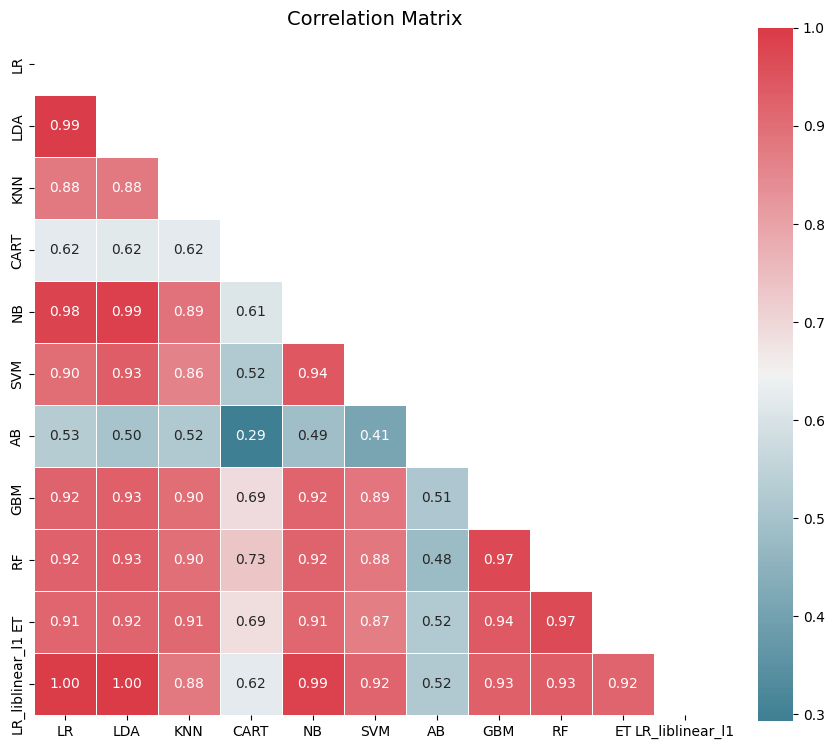

<Axes: title={'center': 'Correlation Matrix'}>

In [178]:
from mlens.visualization import corrmat

corrmat(P.corr(), inflate=False)


Errors are significantly correlated, which is to be expected for models that perform well, since it's typically the outliers that are hard to get right. In fact, if we look at error correlations on a class prediction basis things look a bit more promising:

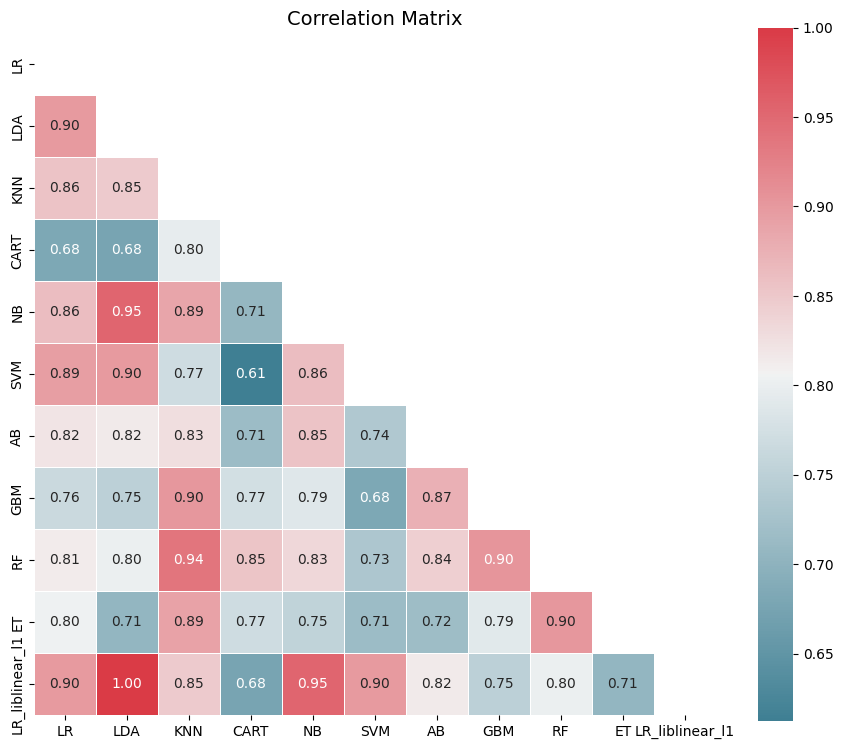

<Axes: title={'center': 'Correlation Matrix'}>

In [179]:
corrmat(P.apply(lambda predic: 1*(predic >= 0.5) - y_test_sc).corr(), inflate=False)

# 6.3 Stacking

In [180]:
base_learners = get_models()
meta_learner = GradientBoostingClassifier(
    n_estimators=1000,
    loss="exponential",
    max_features=6,
    max_depth=3,
    subsample=0.5,
    learning_rate=0.001, 
    random_state=SEED
)

In [226]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier

# Create dummy data (replace this with your actual data loading and preprocessing)
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the base learners
base_learners = [
    ('LR', LogisticRegression()),
    ('SVM', SVC(probability=True)),
    ('LDA', LinearDiscriminantAnalysis()),
    ('KNN', KNeighborsClassifier()),
    ('CART', DecisionTreeClassifier()),
    ('NB', GaussianNB()),
    ('AB', AdaBoostClassifier()),
    ('GBM', GradientBoostingClassifier()),
    ('RF', RandomForestClassifier()),
    ('ET', ExtraTreesClassifier())
]

# Create the ensemble model using VotingClassifier
ensemble = VotingClassifier(estimators=base_learners, voting='soft')

# Fit the ensemble on the training data
ensemble.fit(X_train, y_train)

# Predict using the ensemble on the test data
y_pred = ensemble.predict(X_test)

# Evaluate the ensemble's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test:", accuracy)


Accuracy on test: 0.875


# Conclusion:
- We could reach 87 % accuracy
- Now you can do more feature engineering 
- Tune better 
- Use XGBoost, LightGBM, Nueal Network and other boosting method to improve your result
- Stack more diverse model
- Use your creativity 
- Your comments is warmly welcome
> - Thank you, it there is a misstke Please let me know

# Happy Kaggling!

# If the kernel is useful, Please UpVote